In [3]:
# Split Excel sheets to more easily analyze the data as needed

import pandas as pd
import os

def read_nbs_excel_summary(excel_file_path, save_csv=False, csv_output_dir='nbs_summary_csvs'):
    """
    Reads the NBS Excel summary file and optionally saves each sheet as a CSV file.

    Parameters:
    - excel_file_path (str): Path to the Excel file.
    - save_csv (bool): Whether to save each sheet as a CSV file.
    - csv_output_dir (str): Directory to save CSV files if save_csv is True.

    Returns:
    - dict: A dictionary of DataFrames keyed by sheet names.
    """
    # Check if the file exists
    if not os.path.exists(excel_file_path):
        raise FileNotFoundError(f"The file '{excel_file_path}' does not exist in the specified path.")

    # Load the Excel file
    try:
        excel_data = pd.ExcelFile(excel_file_path, engine='openpyxl')
    except Exception as e:
        raise IOError(f"Error loading Excel file: {e}")

    # List all sheet names
    sheet_names = excel_data.sheet_names
    print()

Available Sheets:
- oac_vs_yac_impc
- oac_vs_yac_impc_summary
- oac_vs_yac_dmnc
- oac_vs_yac_dmnc_summary
- oac_vs_yac_snpc
- oac_vs_yac_snpc_summary
- oac_vs_yac_dmpc
- oac_vs_yac_dmpc_summary
- oac_vs_yac_imnc
- oac_vs_yac_imnc_summary
- oac_vs_yac_spnc
- oac_vs_yac_spnc_summary
- oac_vs_tcoa_impc
- oac_vs_tcoa_impc_summary
- oac_vs_tcoa_dmnc
- oac_vs_tcoa_dmnc_summary
- oac_vs_tcoa_snpc
- oac_vs_tcoa_snpc_summary
- oac_vs_tcoa_dmpc
- oac_vs_tcoa_dmpc_summary
- oac_vs_tcoa_imnc
- oac_vs_tcoa_imnc_summary
- oac_vs_tcoa_spnc
- oac_vs_tcoa_spnc_summary

Sheets loaded into DataFrames:
- oac_vs_yac_impc
- oac_vs_yac_impc_summary
- oac_vs_yac_dmnc
- oac_vs_yac_dmnc_summary
- oac_vs_yac_snpc
- oac_vs_yac_snpc_summary
- oac_vs_yac_dmpc
- oac_vs_yac_dmpc_summary
- oac_vs_yac_imnc
- oac_vs_yac_imnc_summary
- oac_vs_yac_spnc
- oac_vs_yac_spnc_summary
- oac_vs_tcoa_impc
- oac_vs_tcoa_impc_summary
- oac_vs_tcoa_dmnc
- oac_vs_tcoa_dmnc_summary
- oac_vs_tcoa_snpc
- oac_vs_tcoa_snpc_summary
- oac_vs

In [1]:
# User Selection of   .csv Files 

import os
import pandas as pd

# Define the path to the directory containing the CSV files
csv_directory = '/home/cerna3/neuroconn/Analyses/nbs_summary_csvs'

# Function to categorize sheets
def categorize_sheets(directory):
    all_files = os.listdir(directory)
    # Filter out non-CSV files
    csv_files = [f for f in all_files if f.endswith('.csv')]
    
    # Categorize sheets
    change_type_sheets = [f for f in csv_files if not f.endswith('_summary.csv')]
    summary_sheets = [f for f in csv_files if f.endswith('_summary.csv')]
    
    # Sort the sheets for consistent ordering
    change_type_sheets.sort()
    summary_sheets.sort()
    
    return change_type_sheets, summary_sheets

# Get categorized sheets
change_type_sheets, summary_sheets = categorize_sheets(csv_directory)

# Check if any sheets are found
if not change_type_sheets and not summary_sheets:
    raise FileNotFoundError(f"No CSV files found in the directory '{csv_directory}'. Please check the path.")

# Function to display sheets with numerical indices
def display_sheets(sheets, category_name):
    print(f"\n{category_name}:")
    if not sheets:
        print("  No sheets available in this category.")
        return
    for idx, sheet in enumerate(sheets, 1):
        print(f"  {idx}) {sheet}")

# Display Change Type Sheets
display_sheets(change_type_sheets, "Change Type Sheets")

# Display Summary Sheets
display_sheets(summary_sheets, "Summary Sheets")

# Function to get user input for selection
def get_user_selection(options, category_name):
    while True:
        try:
            choice = int(input(f"\nDo you want to operate on:\n"
                               f"1) All {category_name}\n"
                               f"2) Select specific {category_name}\n"
                               f"Enter 1 or 2: "))
            if choice in [1, 2]:
                break
            else:
                print("Please enter a valid option (1 or 2).")
        except ValueError:
            print("Invalid input. Please enter a number (1 or 2).")
    
    selected_sheets = []
    if choice == 1:
        selected_sheets = options.copy()
    else:
        # Display sheets with numbers
        print(f"\nSelect which {category_name} you want to operate on:")
        for idx, sheet in enumerate(options, 1):
            print(f"  {idx}) {sheet}")
        print("  0) Cancel Selection")
        
        while True:
            try:
                selection = input("Enter the numbers of the sheets you want to select, separated by commas (e.g., 1,3,5): ")
                if selection.strip() == '0':
                    print("Selection cancelled.")
                    return []
                selected_indices = [int(x.strip()) for x in selection.split(',') if x.strip().isdigit()]
                # Validate indices
                if all(1 <= idx <= len(options) for idx in selected_indices):
                    selected_sheets = [options[idx - 1] for idx in selected_indices]
                    break
                else:
                    print("One or more selected numbers are out of range. Please try again.")
            except ValueError:
                print("Invalid input. Please enter numbers separated by commas.")
    return selected_sheets

# Function to ask user about sheet categories
def select_sheets(change_sheets, summary_sheets):
    selected_change_sheets = []
    selected_summary_sheets = []
    
    print("\nChoose which sheets to operate on:")
    print("1) Change Type Sheets")
    print("2) Summary Sheets")
    print("3) All Change Type and Summary Sheets")
    print("4) Select Specific Change Type AND Summary Sheets")
    
    while True:
        try:
            main_choice = int(input("Enter 1, 2, 3, or 4: "))
            if main_choice in [1, 2, 3, 4]:
                break
            else:
                print("Please enter a valid option (1, 2, 3, or 4).")
        except ValueError:
            print("Invalid input. Please enter a number (1, 2, 3, or 4).")
    
    if main_choice == 1:
        # Operate on Change Type Sheets
        selected_change_sheets = get_user_selection(change_sheets, "Change Type Sheets")
    elif main_choice == 2:
        # Operate on Summary Sheets
        selected_summary_sheets = get_user_selection(summary_sheets, "Summary Sheets")
    elif main_choice == 3:
        # Operate on all sheets
        selected_change_sheets = change_sheets.copy()
        selected_summary_sheets = summary_sheets.copy()
    elif main_choice == 4:
        # Select specific sheets from both categories
        print("\nFirst, select Change Type Sheets:")
        selected_change_sheets = get_user_selection(change_sheets, "Change Type Sheets")
        
        print("\nNow, select Summary Sheets:")
        selected_summary_sheets = get_user_selection(summary_sheets, "Summary Sheets")
    
    # Combine selections
    selected_sheets = selected_change_sheets + selected_summary_sheets
    
    if not selected_sheets:
        print("\nNo sheets selected for operation.")
    else:
        print("\nSelected Sheets:")
        for sheet in selected_sheets:
            print(f"  - {sheet}")
    
    return selected_sheets

# Get the user's sheet selections
selected_sheets = select_sheets(change_type_sheets, summary_sheets)

# Function to load selected sheets into DataFrames
def load_selected_sheets(directory, sheets):
    """
    Loads selected CSV sheets into a dictionary of DataFrames.
    
    Parameters:
    - directory (str): Path to the directory containing CSV files.
    - sheets (list): List of sheet filenames to load.
    
    Returns:
    - dict: Dictionary of DataFrames keyed by sheet names.
    """
    dataframes = {}
    for sheet in sheets:
        sheet_path = os.path.join(directory, sheet)
        try:
            df = pd.read_csv(sheet_path)
            # Remove the .csv extension for the key
            sheet_name = os.path.splitext(sheet)[0]
            dataframes[sheet_name] = df
            print(f"Loaded '{sheet}' successfully.")
        except Exception as e:
            print(f"Error loading '{sheet}': {e}")
    return dataframes

# Load the selected sheets
if selected_sheets:
    loaded_data = load_selected_sheets(csv_directory, selected_sheets)
    print(f"\nTotal sheets loaded: {len(loaded_data)}")
else:
    loaded_data = {}

# Function to display loaded DataFrames
def display_loaded_data(dataframes):
    """
    Displays the first few rows of each loaded DataFrame.
    
    Parameters:
    - dataframes (dict): Dictionary of DataFrames keyed by sheet names.
    """
    for sheet_name, df in dataframes.items():
        print(f"\nData from '{sheet_name}':")
        display(df.head())  # Using Jupyter's display for better formatting

# Display the loaded DataFrames
if loaded_data:
    display_loaded_data(loaded_data)

# Function to summarize loaded DataFrames
def summarize_loaded_data(dataframes):
    """
    Prints a summary of each loaded DataFrame, including shape and columns.
    
    Parameters:
    - dataframes (dict): Dictionary of DataFrames keyed by sheet names.
    """
    for sheet_name, df in dataframes.items():
        print(f"\nSummary for '{sheet_name}':")
        print(f"  Shape: {df.shape}")
        print(f"  Columns: {list(df.columns)}")

# Summarize the loaded DataFrames
if loaded_data:
    summarize_loaded_data(loaded_data)


Change Type Sheets:
  1) oac_vs_tcoa_dmnc.csv
  2) oac_vs_tcoa_dmpc.csv
  3) oac_vs_tcoa_imnc.csv
  4) oac_vs_tcoa_impc.csv
  5) oac_vs_tcoa_snpc.csv
  6) oac_vs_tcoa_spnc.csv
  7) oac_vs_yac_dmnc.csv
  8) oac_vs_yac_dmpc.csv
  9) oac_vs_yac_imnc.csv
  10) oac_vs_yac_impc.csv
  11) oac_vs_yac_snpc.csv
  12) oac_vs_yac_spnc.csv

Summary Sheets:
  1) oac_vs_tcoa_dmnc_summary.csv
  2) oac_vs_tcoa_dmpc_summary.csv
  3) oac_vs_tcoa_imnc_summary.csv
  4) oac_vs_tcoa_impc_summary.csv
  5) oac_vs_tcoa_snpc_summary.csv
  6) oac_vs_tcoa_spnc_summary.csv
  7) oac_vs_yac_dmnc_summary.csv
  8) oac_vs_yac_dmpc_summary.csv
  9) oac_vs_yac_imnc_summary.csv
  10) oac_vs_yac_impc_summary.csv
  11) oac_vs_yac_snpc_summary.csv
  12) oac_vs_yac_spnc_summary.csv

Choose which sheets to operate on:
1) Change Type Sheets
2) Summary Sheets
3) All Change Type and Summary Sheets
4) Select Specific Change Type AND Summary Sheets


Enter 1, 2, 3, or 4:  1

Do you want to operate on:
1) All Change Type Sheets
2) Select specific Change Type Sheets
Enter 1 or 2:  1



Selected Sheets:
  - oac_vs_tcoa_dmnc.csv
  - oac_vs_tcoa_dmpc.csv
  - oac_vs_tcoa_imnc.csv
  - oac_vs_tcoa_impc.csv
  - oac_vs_tcoa_snpc.csv
  - oac_vs_tcoa_spnc.csv
  - oac_vs_yac_dmnc.csv
  - oac_vs_yac_dmpc.csv
  - oac_vs_yac_imnc.csv
  - oac_vs_yac_impc.csv
  - oac_vs_yac_snpc.csv
  - oac_vs_yac_spnc.csv
Loaded 'oac_vs_tcoa_dmnc.csv' successfully.
Loaded 'oac_vs_tcoa_dmpc.csv' successfully.
Loaded 'oac_vs_tcoa_imnc.csv' successfully.
Loaded 'oac_vs_tcoa_impc.csv' successfully.
Loaded 'oac_vs_tcoa_snpc.csv' successfully.
Loaded 'oac_vs_tcoa_spnc.csv' successfully.
Loaded 'oac_vs_yac_dmnc.csv' successfully.
Loaded 'oac_vs_yac_dmpc.csv' successfully.
Loaded 'oac_vs_yac_imnc.csv' successfully.
Loaded 'oac_vs_yac_impc.csv' successfully.
Loaded 'oac_vs_yac_snpc.csv' successfully.
Loaded 'oac_vs_yac_spnc.csv' successfully.

Total sheets loaded: 12

Data from 'oac_vs_tcoa_dmnc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,...,Alternative,Enhancement,Normalization,Deterioration,Maladaptive,Exacerbation,Decompensation,Group3_Mean,Total_n,Participant_IDs
0,5,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_pCunPCC_1-lh,Frontoparietal-Default,False,0.008382,-0.042827,-0.051209,88,0.036,...,0,0,0,1,0,0,0,0.031955,10,"205,207,209,216,217,219,401,402,408,412"
1,6,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_pCunPCC_2-lh,Frontoparietal-Default,False,0.064801,-0.013796,-0.078597,88,0.036,...,0,0,0,0,1,0,0,-0.036702,10,"205,207,209,216,217,219,401,402,408,412"
2,12,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_6-lh,Frontoparietal-Default,False,0.049759,-0.022799,-0.072557,88,0.036,...,0,0,0,1,0,0,0,0.043672,10,"205,207,209,216,217,219,401,402,408,412"
3,28,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_FrOperIns_2-lh,Frontoparietal-VentralAttention,False,0.003749,-0.026790,-0.030539,88,0.036,...,0,0,0,1,0,0,0,-0.001335,10,"205,207,209,216,217,219,401,402,408,412"
4,29,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_Med_1-lh,Frontoparietal-VentralAttention,False,0.012651,-0.019987,-0.032638,88,0.036,...,0,0,0,1,0,0,0,0.065445,10,"205,207,209,216,217,219,401,402,408,412"



Data from 'oac_vs_tcoa_dmpc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,...,Alternative,Enhancement,Normalization,Deterioration,Maladaptive,Exacerbation,Decompensation,Group3_Mean,Total_n,Participant_IDs
0,3,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_Par_1-lh,Frontoparietal-Default,False,-0.072472,0.019119,0.091591,88,0.036,...,0,0,0,1,0,0,0,0.008854,10,"205,207,209,216,217,219,401,402,408,412"
1,7,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_1-lh,Frontoparietal-Default,False,-0.028159,0.013906,0.042066,88,0.036,...,0,0,0,0,0,0,0,0.043383,10,"205,207,209,216,217,219,401,402,408,412"
2,10,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_4-lh,Frontoparietal-Default,False,-0.002459,0.014872,0.017331,88,0.036,...,0,0,0,1,0,0,0,-0.010686,10,"205,207,209,216,217,219,401,402,408,412"
3,11,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_5-lh,Frontoparietal-Default,False,-0.018496,0.021775,0.040272,88,0.036,...,0,0,0,1,0,0,0,-0.014393,10,"205,207,209,216,217,219,401,402,408,412"
4,16,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_FEF_1-lh,Frontoparietal-DorsalAttention,False,-0.009225,0.011843,0.021068,88,0.036,...,0,0,0,1,0,0,0,0.011003,10,"205,207,209,216,217,219,401,402,408,412"



Data from 'oac_vs_tcoa_imnc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,...,Alternative,Enhancement,Normalization,Deterioration,Maladaptive,Exacerbation,Decompensation,Group3_Mean,Total_n,Participant_IDs
0,32,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_ParOper_1-lh,Frontoparietal-VentralAttention,False,-0.008703,-0.020305,-0.011602,88,0.036,...,0,0,0,0,0,0,0,-0.002678,10,"205,207,209,216,217,219,401,402,408,412"
1,51,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Cont_Par_2-rh,Frontoparietal-Frontoparietal,False,-0.005436,-0.021671,-0.016235,88,0.036,...,0,0,0,1,0,0,0,-0.022245,10,"205,207,209,216,217,219,401,402,408,412"
2,53,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Cont_PFCl_2-rh,Frontoparietal-Frontoparietal,False,-0.026383,-0.041657,-0.015274,88,0.036,...,0,0,0,0,0,0,0,0.052760,10,"205,207,209,216,217,219,401,402,408,412"
3,58,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Default_Par_1-rh,Frontoparietal-Default,False,-0.029453,-0.030680,-0.001227,88,0.036,...,1,0,0,0,0,0,0,-0.014643,10,"205,207,209,216,217,219,401,402,408,412"
4,86,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_SomMot_4-rh,Frontoparietal-Somatomotor,False,-0.024762,-0.030774,-0.006012,88,0.036,...,0,0,0,0,0,0,0,-0.003112,10,"205,207,209,216,217,219,401,402,408,412"



Data from 'oac_vs_tcoa_impc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,...,Alternative,Enhancement,Normalization,Deterioration,Maladaptive,Exacerbation,Decompensation,Group3_Mean,Total_n,Participant_IDs
0,0,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Cont_Par_1-lh,Frontoparietal-Frontoparietal,False,0.013604,0.041657,0.028053,88,0.036,...,0,0,0,0,0,0,0,-0.060353,10,"205,207,209,216,217,219,401,402,408,412"
1,17,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_Post_1-lh,Frontoparietal-DorsalAttention,False,0.028074,0.034911,0.006837,88,0.036,...,0,0,0,0,0,0,0,-0.004785,10,"205,207,209,216,217,219,401,402,408,412"
2,24,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Limbic_OFC_1-lh,Frontoparietal-Limbic,False,0.023668,0.056124,0.032455,88,0.036,...,0,0,0,0,0,0,0,-0.022861,10,"205,207,209,216,217,219,401,402,408,412"
3,41,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Vis_2-lh,Frontoparietal-Visual,False,0.001605,0.009228,0.007623,88,0.036,...,0,0,0,0,0,0,0,-0.001475,10,"205,207,209,216,217,219,401,402,408,412"
4,42,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Vis_3-lh,Frontoparietal-Visual,False,0.010961,0.016665,0.005704,88,0.036,...,0,0,0,0,0,0,0,-0.029102,10,"205,207,209,216,217,219,401,402,408,412"



Data from 'oac_vs_tcoa_snpc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,...,Alternative,Enhancement,Normalization,Deterioration,Maladaptive,Exacerbation,Decompensation,Group3_Mean,Total_n,Participant_IDs
0,1,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Cont_PFCl_1-lh,Frontoparietal-Frontoparietal,False,-0.083717,-0.026022,0.057695,88,0.036,...,1,0,0,0,0,0,0,0.029084,10,"205,207,209,216,217,219,401,402,408,412"
1,9,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_3-lh,Frontoparietal-Default,False,-0.087486,-0.025724,0.061762,88,0.036,...,0,0,0,0,1,0,0,-0.014702,10,"205,207,209,216,217,219,401,402,408,412"
2,14,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_Temp_1-lh,Frontoparietal-Default,False,-0.014452,-0.008350,0.006102,88,0.036,...,0,0,0,1,0,0,0,-0.049841,10,"205,207,209,216,217,219,401,402,408,412"
3,15,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_Temp_2-lh,Frontoparietal-Default,False,-0.042694,-0.037658,0.005035,88,0.036,...,0,0,0,0,1,0,0,-0.020415,10,"205,207,209,216,217,219,401,402,408,412"
4,31,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_Med_3-lh,Frontoparietal-VentralAttention,False,-0.070700,-0.053620,0.017079,88,0.036,...,0,0,0,0,0,0,0,0.023797,10,"205,207,209,216,217,219,401,402,408,412"



Data from 'oac_vs_tcoa_spnc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,...,Alternative,Enhancement,Normalization,Deterioration,Maladaptive,Exacerbation,Decompensation,Group3_Mean,Total_n,Participant_IDs
0,2,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Cont_pCun_1-lh,Frontoparietal-Frontoparietal,False,0.024210,0.000163,-0.024048,88,0.036,...,1,0,0,0,0,0,0,-0.021603,10,"205,207,209,216,217,219,401,402,408,412"
1,13,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_7-lh,Frontoparietal-Default,False,0.084340,0.040636,-0.043704,88,0.036,...,0,0,0,0,1,0,0,0.000815,10,"205,207,209,216,217,219,401,402,408,412"
2,19,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_Post_3-lh,Frontoparietal-DorsalAttention,False,0.067410,0.010182,-0.057228,88,0.036,...,0,0,0,0,0,0,0,-0.058641,10,"205,207,209,216,217,219,401,402,408,412"
3,20,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_Post_4-lh,Frontoparietal-DorsalAttention,False,0.072259,0.027790,-0.044469,88,0.036,...,0,0,0,1,0,0,0,0.034606,10,"205,207,209,216,217,219,401,402,408,412"
4,21,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_Post_5-lh,Frontoparietal-DorsalAttention,False,0.072207,0.007413,-0.064794,88,0.036,...,0,0,0,0,1,0,0,-0.010666,10,"205,207,209,216,217,219,401,402,408,412"



Data from 'oac_vs_yac_dmnc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,Cohens_D,T_Statistic,Component_Density,State_Window,Mode,Component_ID,Favored_Group,Mechanism
0,9,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_3-lh,Frontoparietal-Default,False,0.011687,-0.011430,-0.023118,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
1,12,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_PFC_6-lh,Frontoparietal-Default,False,0.045389,-0.007137,-0.052525,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
2,30,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_Med_2-lh,Frontoparietal-VentralAttention,False,0.013215,-0.021378,-0.034593,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
3,34,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SomMot_1-lh,Frontoparietal-Somatomotor,False,0.011149,-0.004014,-0.015163,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
4,47,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Vis_8-lh,Frontoparietal-Visual,False,0.020820,-0.001397,-0.022217,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN



Data from 'oac_vs_yac_dmpc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,Cohens_D,T_Statistic,Component_Density,State_Window,Mode,Component_ID,Favored_Group,Mechanism
0,5,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_pCunPCC_1-lh,Frontoparietal-Default,False,-0.016403,0.000395,0.016798,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
1,16,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_FEF_1-lh,Frontoparietal-DorsalAttention,False,-0.014278,0.001032,0.015310,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
2,87,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_SomMot_5-rh,Frontoparietal-Somatomotor,False,-0.020504,0.004250,0.024754,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
3,88,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_SomMot_6-rh,Frontoparietal-Somatomotor,False,-0.003828,0.003964,0.007792,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
4,89,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_SomMot_7-rh,Frontoparietal-Somatomotor,False,-0.000234,0.021605,0.021839,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN



Data from 'oac_vs_yac_imnc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,Cohens_D,T_Statistic,Component_Density,State_Window,Mode,Component_ID,Favored_Group,Mechanism
0,1,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Cont_PFCl_1-lh,Frontoparietal-Frontoparietal,False,-0.000037,-0.016759,-0.016721,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
1,24,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Limbic_OFC_1-lh,Frontoparietal-Limbic,False,-0.008150,-0.026585,-0.018435,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
2,32,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_ParOper_1-lh,Frontoparietal-VentralAttention,False,-0.019291,-0.022606,-0.003314,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
3,76,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Limbic_OFC_1-rh,Frontoparietal-Limbic,False,-0.000081,-0.029282,-0.029201,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
4,79,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_SalVentAttn_Med_1-rh,Frontoparietal-VentralAttention,False,-0.005209,-0.021384,-0.016175,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN



Data from 'oac_vs_yac_impc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,Cohens_D,T_Statistic,Component_Density,State_Window,Mode,Component_ID,Favored_Group,Mechanism
0,21,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_Post_5-lh,Frontoparietal-DorsalAttention,False,0.005171,0.011713,0.006541,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
1,43,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Vis_4-lh,Frontoparietal-Visual,False,0.005552,0.015423,0.009871,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
2,67,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Default_Temp_2-rh,Frontoparietal-Default,False,0.002646,0.024924,0.022277,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
3,96,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Vis_6-rh,Frontoparietal-Visual,False,0.000045,0.012842,0.012797,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN
4,207,7Networks_LH_Cont_PFCl_1-lh,7Networks_LH_Default_PFC_6-lh,Frontoparietal-Default,False,0.011608,0.021807,0.010200,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,OAC favored,NaN



Data from 'oac_vs_yac_snpc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,Cohens_D,T_Statistic,Component_Density,State_Window,Mode,Component_ID,Favored_Group,Mechanism
0,6,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Default_pCunPCC_2-lh,Frontoparietal-Default,False,-0.049704,-0.021190,0.028514,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
1,18,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_Post_2-lh,Frontoparietal-DorsalAttention,False,-0.051748,-0.024752,0.026996,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
2,28,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_FrOperIns_2-lh,Frontoparietal-VentralAttention,False,-0.064083,-0.036564,0.027519,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
3,45,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_Vis_6-lh,Frontoparietal-Visual,True,-0.066517,-0.039638,0.026879,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
4,60,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Default_pCunPCC_2-rh,Frontoparietal-Default,False,-0.042439,-0.016401,0.026037,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN



Data from 'oac_vs_yac_spnc':


,Edge,Region1,Region2,Network_Pair,Is_Direct_Connection,Difference,Group1_Mean,Group2_Mean,Component_Size,Component_PValue,Cohens_D,T_Statistic,Component_Density,State_Window,Mode,Component_ID,Favored_Group,Mechanism
0,22,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_DorsAttn_Post_6-lh,Frontoparietal-DorsalAttention,True,0.064938,0.028945,-0.035993,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
1,29,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_Med_1-lh,Frontoparietal-VentralAttention,False,0.036943,0.017627,-0.019316,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
2,31,7Networks_LH_Cont_Cing_1-lh,7Networks_LH_SalVentAttn_Med_3-lh,Frontoparietal-VentralAttention,True,0.088040,0.004450,-0.083590,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
3,50,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Cont_Par_1-rh,Frontoparietal-Frontoparietal,False,0.080932,0.071075,-0.009857,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN
4,53,7Networks_LH_Cont_Cing_1-lh,7Networks_RH_Cont_PFCl_2-rh,Frontoparietal-Frontoparietal,False,0.040427,0.018590,-0.021837,38,0.001,0.042968,0.093318,0.054054,state_0_window_7,EC,EC_state_0_window_7_comp_0,YAC favored,NaN



Summary for 'oac_vs_tcoa_dmnc':
  Shape: (41926, 29)
  Columns: ['Edge', 'Region1', 'Region2', 'Network_Pair', 'Is_Direct_Connection', 'Difference', 'Group1_Mean', 'Group2_Mean', 'Component_Size', 'Component_PValue', 'Cohens_D', 'T_Statistic', 'Component_Density', 'State_Window', 'Mode', 'Component_ID', 'Favored_Group', 'Mechanism', 'Restoration', 'Alternative', 'Enhancement', 'Normalization', 'Deterioration', 'Maladaptive', 'Exacerbation', 'Decompensation', 'Group3_Mean', 'Total_n', 'Participant_IDs']

Summary for 'oac_vs_tcoa_dmpc':
  Shape: (41559, 29)
  Columns: ['Edge', 'Region1', 'Region2', 'Network_Pair', 'Is_Direct_Connection', 'Difference', 'Group1_Mean', 'Group2_Mean', 'Component_Size', 'Component_PValue', 'Cohens_D', 'T_Statistic', 'Component_Density', 'State_Window', 'Mode', 'Component_ID', 'Favored_Group', 'Mechanism', 'Restoration', 'Alternative', 'Enhancement', 'Normalization', 'Deterioration', 'Maladaptive', 'Exacerbation', 'Decompensation', 'Group3_Mean', 'Total_n', '

In [2]:
# Add columns to account for n's and exact IDs used per comparison 

import os
import numpy as np
import pandas as pd
from pathlib import Path

# Define directories
base_dir = '/home/cerna3/neuroconn/data/out/subjects/'
csv_dir = '/home/cerna3/neuroconn/Analyses/nbs_summary_csvs/oac_vs_tcoa_reclassified'
output_dir = os.path.join(csv_dir, 'participant_annotated)

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define participant groups
YACS = ['101', '102', '103', '104', '105', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120']
OACS = ['202', '205', '206', '207', '208', '209', '210', '211', '214', '215', '216', '217', '218', '219', '221']
TCOAS = ['401', '402', '403', '404', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416']

def get_participant_groups(sheet_name):
    """Determine which participant groups to use based on sheet name."""
    if 'oac_vs_tcoa' in sheet_name:
        return OACS, TCOAS
    elif 'oac_vs_yac' in sheet_name:
        return OACS, YACS
    else:
        raise ValueError(f"Unknown comparison in sheet name: {sheet_name}")

def check_participant_availability(participant, mode, state_window):
    """
    Check if a participant has data for a specific mode and state-window combination.
    """
    npz_path = os.path.join(base_dir, participant, mode, 
                           f"{participant}_correlation_matrices.npy.npz")
    
    if not os.path.exists(npz_path):
        return False
    
    try:
        # Load the npz file
        data = np.load(npz_path, allow_pickle=True)
        
        # Parse state and window from state_window string
        state, window = map(int, state_window.replace('state_', '').replace('window_', '').split('_'))
        
        # Check if this state-window exists in the data
        key = f"{state}_{window}"
        return key in data.files
        
    except Exception as e:
        print(f"Error checking {npz_path}: {e}")
        return False

def get_available_participants(group1, group2, mode, state_window):
    """
    Get list of participants from both groups that have data for the specified mode and state-window.
    """
    available_participants = []
    
    for participant in group1 + group2:
        if check_participant_availability(participant, mode, state_window):
            available_participants.append(participant)
            
    return available_participants

def process_sheet(df, sheet_name):
    """
    Process a single sheet to add participant information.
    """
    # Get relevant participant groups
    group1, group2 = get_participant_groups(sheet_name)
    
    # Initialize new columns
    df['Total_n'] = 0
    df['Participant_IDs'] = ''
    
    # Get unique mode and state-window combinations
    unique_combinations = df[['Mode', 'State_Window']].drop_duplicates()
    
    # Create a dictionary to store participant info for each combination
    participant_info = {}
    
    # Process each unique combination
    for _, row in unique_combinations.iterrows():
        mode = row['Mode']
        state_window = row['State_Window']
        key = (mode, state_window)
        
        available_participants = get_available_participants(group1, group2, mode, state_window)
        participant_info[key] = {
            'total_n': len(available_participants),
            'participant_ids': ','.join(sorted(available_participants))
        }
    
    # Update the DataFrame
    for idx in df.index:
        key = (df.at[idx, 'Mode'], df.at[idx, 'State_Window'])
        info = participant_info.get(key, {'total_n': 0, 'participant_ids': ''})
        df.at[idx, 'Total_n'] = info['total_n']
        df.at[idx, 'Participant_IDs'] = info['participant_ids']
    
    return df

def main():
    """
    Main function to process all change type sheets.
    """
    # Get list of change type sheets (excluding summary sheets)
    change_type_sheets = [f for f in os.listdir(csv_dir) 
                         if f.endswith('.csv') and not f.endswith('_summary.csv')]
    
    for sheet_name in change_type_sheets:
        print(f"Processing {sheet_name}...")
        
        try:
            # Read the sheet
            df = pd.read_csv(os.path.join(csv_dir, sheet_name))
            
            # Process the sheet
            df_processed = process_sheet(df, sheet_name)
            
            # Save to new location
            output_path = os.path.join(output_dir, sheet_name)
            df_processed.to_csv(output_path, index=False)
            print(f"Saved processed sheet to {output_path}")
            
        except Exception as e:
            print(f"Error processing {sheet_name}: {e}")
    
    print("\nProcessing complete. New sheets saved in:", output_dir)

if __name__ == "__main__":
    main()

Processing oac_vs_tcoa_dmnc.csv...
Saved processed sheet to /home/cerna3/neuroconn/Analyses/nbs_summary_csvs/oac_vs_tcoa_reclassified/participant_annotated_2/oac_vs_tcoa_dmnc.csv
Processing oac_vs_tcoa_impc.csv...
Saved processed sheet to /home/cerna3/neuroconn/Analyses/nbs_summary_csvs/oac_vs_tcoa_reclassified/participant_annotated_2/oac_vs_tcoa_impc.csv
Processing oac_vs_tcoa_imnc.csv...
Saved processed sheet to /home/cerna3/neuroconn/Analyses/nbs_summary_csvs/oac_vs_tcoa_reclassified/participant_annotated_2/oac_vs_tcoa_imnc.csv
Processing oac_vs_tcoa_spnc.csv...
Saved processed sheet to /home/cerna3/neuroconn/Analyses/nbs_summary_csvs/oac_vs_tcoa_reclassified/participant_annotated_2/oac_vs_tcoa_spnc.csv
Processing oac_vs_tcoa_snpc.csv...
Saved processed sheet to /home/cerna3/neuroconn/Analyses/nbs_summary_csvs/oac_vs_tcoa_reclassified/participant_annotated_2/oac_vs_tcoa_snpc.csv
Processing oac_vs_tcoa_dmpc.csv...
Saved processed sheet to /home/cerna3/neuroconn/Analyses/nbs_summary_c

In [8]:
# Wilcoxon Signed Rank Test: All, Intra, and Inter Network Results

import pandas as pd
import numpy as np
from scipy import stats
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def get_change_type_dfs(loaded_data):
    """
    Organize loaded DataFrames by change type and comparison.
    """
    change_types_data = {}
    
    for sheet_name, df in loaded_data.items():
        if '_summary' in sheet_name:
            continue
            
        if 'oac_vs_yac' in sheet_name:
            comparison = 'oac_vs_yac'
        elif 'oac_vs_tcoa' in sheet_name:
            comparison = 'oac_vs_tcoa'
        else:
            continue
            
        for ct in ['impc', 'dmnc', 'snpc', 'imnc', 'dmpc', 'spnc']:
            if f'_{ct}' in sheet_name:
                if ct not in change_types_data:
                    change_types_data[ct] = {}
                change_types_data[ct][comparison] = df
                break
    
    return change_types_data

def match_connections_by_type(aging_df, taichi_df, connection_type='all'):
    """
    Match connections between aging and tai chi comparisons based on connection type.
    connection_type: 'all', 'intra', or 'inter'
    """
    def create_conn_id(row):
        sorted_regions = sorted([row['Region1'], row['Region2']])
        return f"{sorted_regions[0]}_{sorted_regions[1]}_{row['State_Window']}_{row['Mode']}"
    
    # Create copies of the DataFrames to avoid warnings
    aging_df = aging_df.copy()
    taichi_df = taichi_df.copy()
    
    # Filter by connection type if specified
    if connection_type == 'intra':
        aging_mask = aging_df['Network_Pair'].apply(
            lambda x: x.split('-')[0] == x.split('-')[1] if '-' in str(x) else False)
        taichi_mask = taichi_df['Network_Pair'].apply(
            lambda x: x.split('-')[0] == x.split('-')[1] if '-' in str(x) else False)
        
        aging_df = aging_df.loc[aging_mask].copy()
        taichi_df = taichi_df.loc[taichi_mask].copy()
        
    elif connection_type == 'inter':
        aging_mask = aging_df['Network_Pair'].apply(
            lambda x: x.split('-')[0] != x.split('-')[1] if '-' in str(x) else True)
        taichi_mask = taichi_df['Network_Pair'].apply(
            lambda x: x.split('-')[0] != x.split('-')[1] if '-' in str(x) else True)
        
        aging_df = aging_df.loc[aging_mask].copy()
        taichi_df = taichi_df.loc[taichi_mask].copy()
    
    # Add conn_id column
    aging_df.loc[:, 'conn_id'] = aging_df.apply(create_conn_id, axis=1)
    taichi_df.loc[:, 'conn_id'] = taichi_df.apply(create_conn_id, axis=1)
    
    # Find common connections
    common_conns = set(aging_df['conn_id']) & set(taichi_df['conn_id'])
    
    if not common_conns:
        return None, None
    
    # Create final filtered copies
    aging_matched = aging_df[aging_df['conn_id'].isin(common_conns)].sort_values('conn_id').copy()
    taichi_matched = taichi_df[taichi_df['conn_id'].isin(common_conns)].sort_values('conn_id').copy()
    
    # Verify the matched dataframes have the same length and order
    if len(aging_matched) != len(taichi_matched):
        print(f"Warning: Unequal lengths after matching - Aging: {len(aging_matched)}, Taichi: {len(taichi_matched)}")
        return None, None
    
    # Ensure matching order
    aging_matched = aging_matched.reset_index(drop=True)
    taichi_matched = taichi_matched.reset_index(drop=True)
    
    # Verify conn_ids match
    if not (aging_matched['conn_id'] == taichi_matched['conn_id']).all():
        print("Warning: Connection IDs don't match after sorting")
        return None, None
        
    return aging_matched, taichi_matched

def interpret_cohens_d(aging_effect, taichi_effect, cohens_d):
    """
    Interpret the direction of Cohen's d effect using absolute magnitudes.
    """
    if abs(taichi_effect) > abs(aging_effect):
        return "TC effects larger than aging effects"
    elif abs(aging_effect) > abs(taichi_effect):
        return "Aging effects larger than TC effects"
    else:
        return "No difference between effects"

def perform_statistical_comparison(aging_df, taichi_df, connection_type='all'):
    """
    Perform Wilcoxon signed-rank test on matched connections.
    """
    aging_matched, taichi_matched = match_connections_by_type(aging_df, taichi_df, connection_type)
    
    if aging_matched is None or taichi_matched is None or len(aging_matched) == 0:
        print(f"No matching {connection_type} connections found!")
        return None
    
    aging_diffs = aging_matched['Difference'].values
    taichi_diffs = taichi_matched['Difference'].values
    
    # Verify lengths match before proceeding
    if len(aging_diffs) != len(taichi_diffs):
        print(f"Error: Unequal lengths - Aging: {len(aging_diffs)}, Taichi: {len(taichi_diffs)}")
        return None
    
    # Calculate Wilcoxon signed-rank test
    stat, p_value = stats.wilcoxon(aging_diffs, taichi_diffs)
    
    # Calculate mean effects
    aging_effect = np.mean(aging_diffs)
    taichi_effect = np.mean(taichi_diffs)
    
    # Calculate Cohen's d using absolute differences
    difference_scores = abs(aging_diffs) - abs(taichi_diffs)
    cohens_d = np.mean(difference_scores) / np.std(difference_scores, ddof=1)
    
    return {
        'N_Connections': len(aging_diffs),
        'W_Statistic': stat,
        'P_Value': p_value,
        'Cohens_D': cohens_d,
        'Cohens_D_Interpretation': interpret_cohens_d(aging_effect, taichi_effect, cohens_d),
        'Aging_Effect': aging_effect,
        'Aging_SE': stats.sem(aging_diffs),
        'TaiChi_Effect': taichi_effect,
        'TaiChi_SE': stats.sem(taichi_diffs)
    }

def run_aggregate_analysis(change_types_data):
    """
    Run the aggregate analysis for all change types and connection types.
    """
    all_results = []
    connection_types = ['all', 'intra', 'inter']
    
    for ct, data in change_types_data.items():
        if 'oac_vs_yac' not in data or 'oac_vs_tcoa' not in data:
            continue
            
        print(f"\nAnalyzing {ct.upper()}:")
        
        for conn_type in connection_types:
            print(f"  Processing {conn_type} connections...", end="\r")
            
            result = perform_statistical_comparison(
                data['oac_vs_yac'],
                data['oac_vs_tcoa'],
                conn_type
            )
            
            if result:
                result['Change_Type'] = ct.upper()
                result['Connection_Type'] = conn_type
                all_results.append(result)
        
        print(" " * 80, end="\r")  # Clear the last status message
    
    if not all_results:
        raise ValueError("No results were generated. Check your input data.")
    
    # Convert to DataFrame with specific column order
    results_df = pd.DataFrame(all_results)
    
    # Define column order
    column_order = [
        'Change_Type', 'Connection_Type', 'N_Connections',
        'W_Statistic', 'P_Value', 'Cohens_D', 'Cohens_D_Interpretation',
        'Aging_Effect', 'Aging_SE', 'TaiChi_Effect', 'TaiChi_SE'
    ]
    
    # Reorder columns
    results_df = results_df[column_order]
    
    return results_df

# Validate that we have the necessary data loaded
if 'loaded_data' not in globals():
    raise NameError("Please run the data loading script first to create 'loaded_data'")

# Get organized data by change type
print("Organizing loaded data by change type...")
change_types_data = get_change_type_dfs(loaded_data)

# Run the analysis and save results
aggregate_results = run_aggregate_analysis(change_types_data)
aggregate_results.to_csv('wilcoxon_&_McNamar_test_results_by_network_type.csv', index=False)
print("\nResults saved to 'wilcoxon_&_McNamar_test_results_by_network_type.csv'")

# Display summary of results
print("\nSummary of results:")
print(f"Total analyses performed: {len(aggregate_results)}")
print("\nSignificant findings (p < 0.05):")
significant_results = aggregate_results[aggregate_results['P_Value'] < 0.05]
if not significant_results.empty:
    for _, row in significant_results.iterrows():
        print(f"\n{row['Change_Type']} - {row['Connection_Type']}:")
        print(f"  N Connections: {row['N_Connections']}")
        print(f"  p-value: {row['P_Value']:.4f}")
        print(f"  Cohen's d: {row['Cohens_D']:.4f}")
        print(f"  Interpretation: {row['Cohens_D_Interpretation']}")
else:
    print("No significant findings.")

Organizing loaded data by change type...

Analyzing DMNC:
                                                                                
Analyzing DMPC:
                                                                                
Analyzing IMNC:
                                                                                
Analyzing IMPC:
                                                                                
Analyzing SNPC:
                                                                                
Analyzing SPNC:
                                                                                
Results saved to 'wilcoxon_&_McNamar_test_results_by_network_type.csv'

Summary of results:
Total analyses performed: 18

Significant findings (p < 0.05):

DMNC - all:
  N Connections: 355
  p-value: 0.0000
  Cohen's d: -0.3922
  Interpretation: TC effects larger than aging effects

DMNC - intra:
  N Connections: 52
  p-value: 0.0362
  Cohen's d: -0.3244
  Interpretation: T

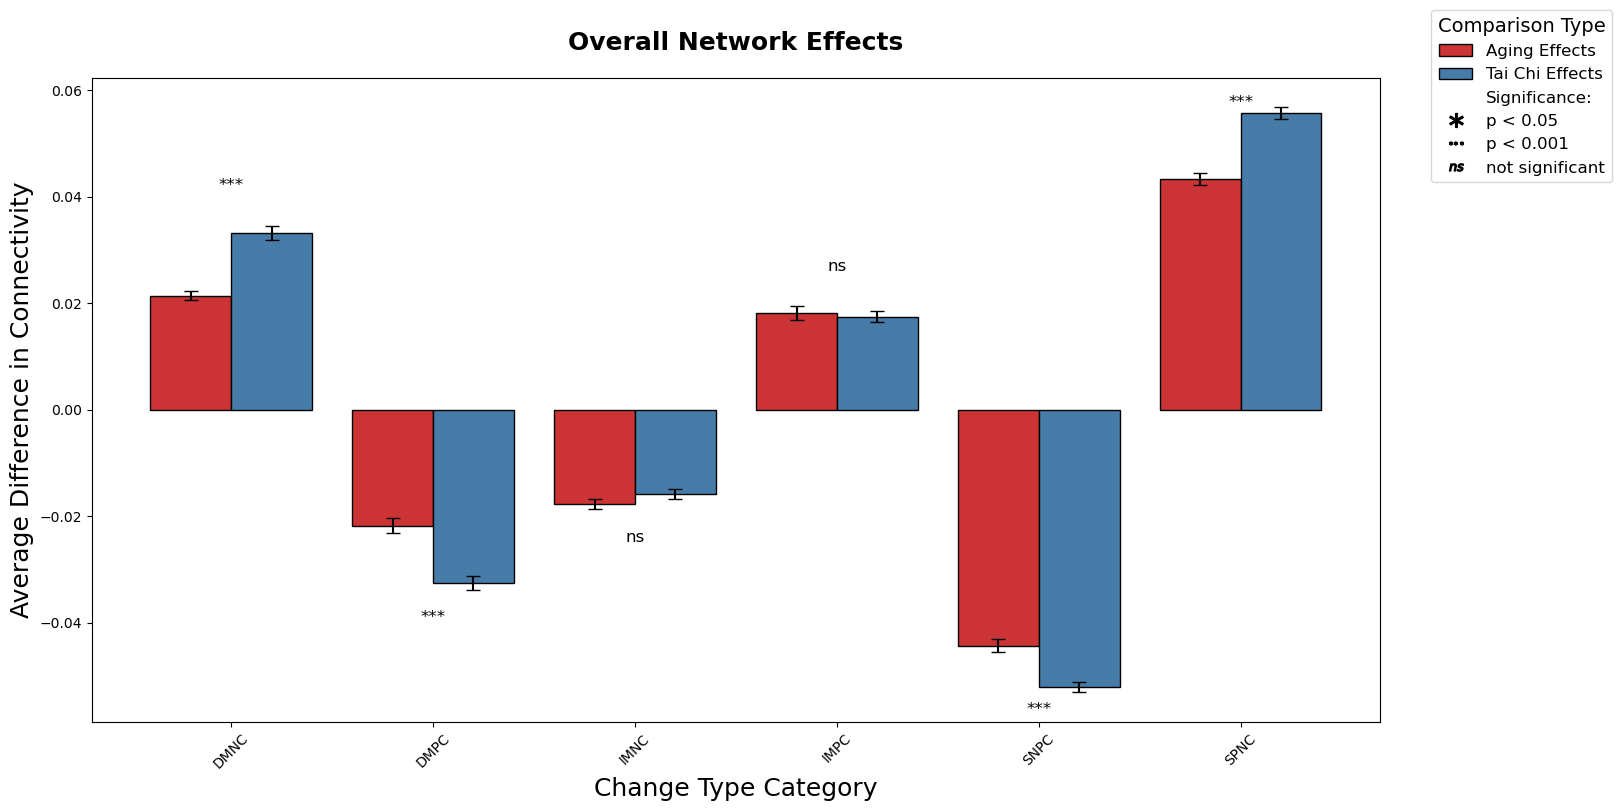

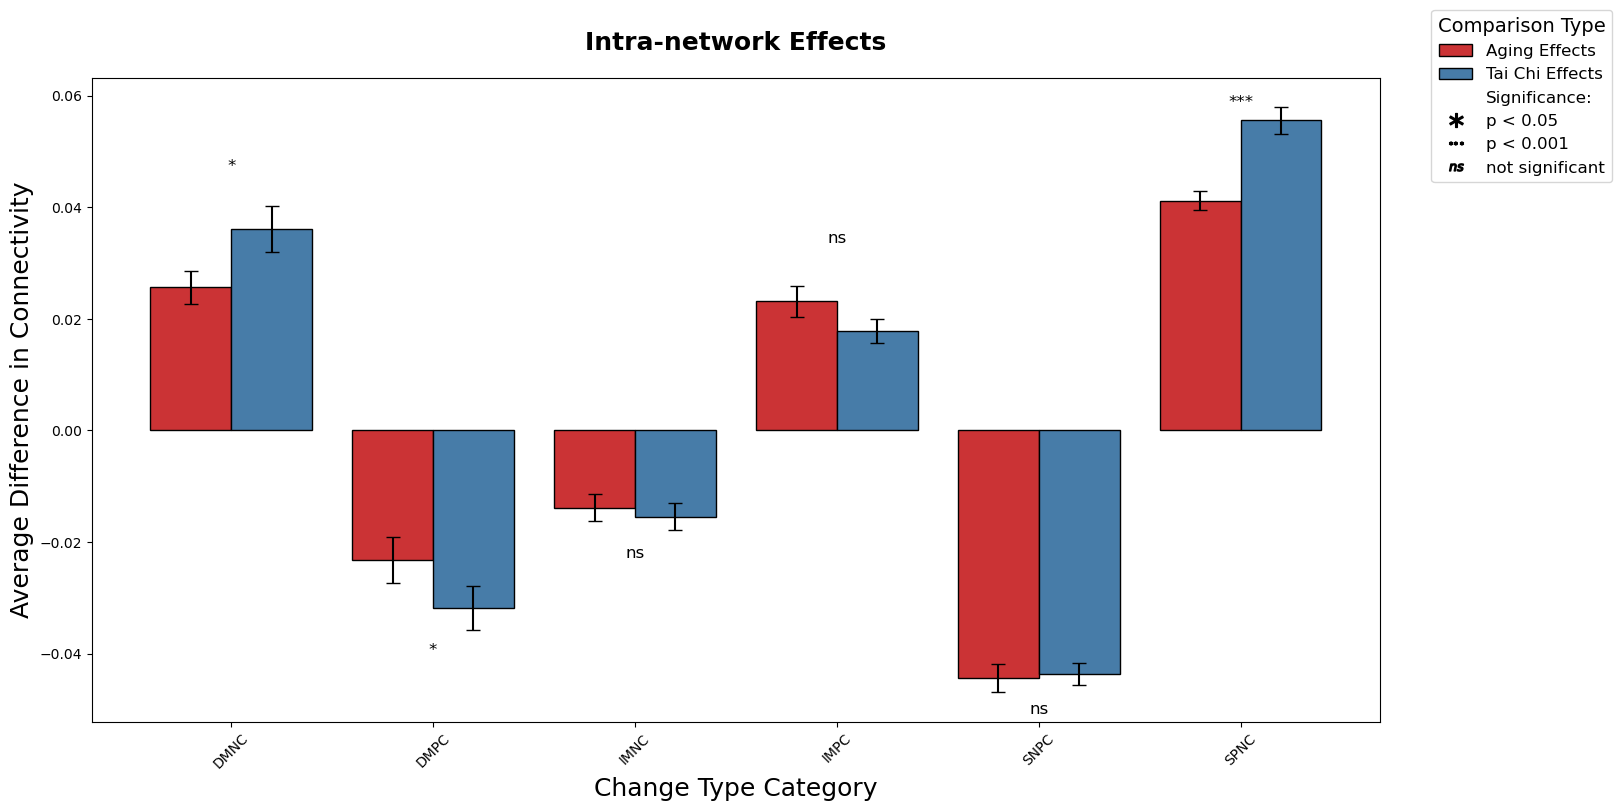

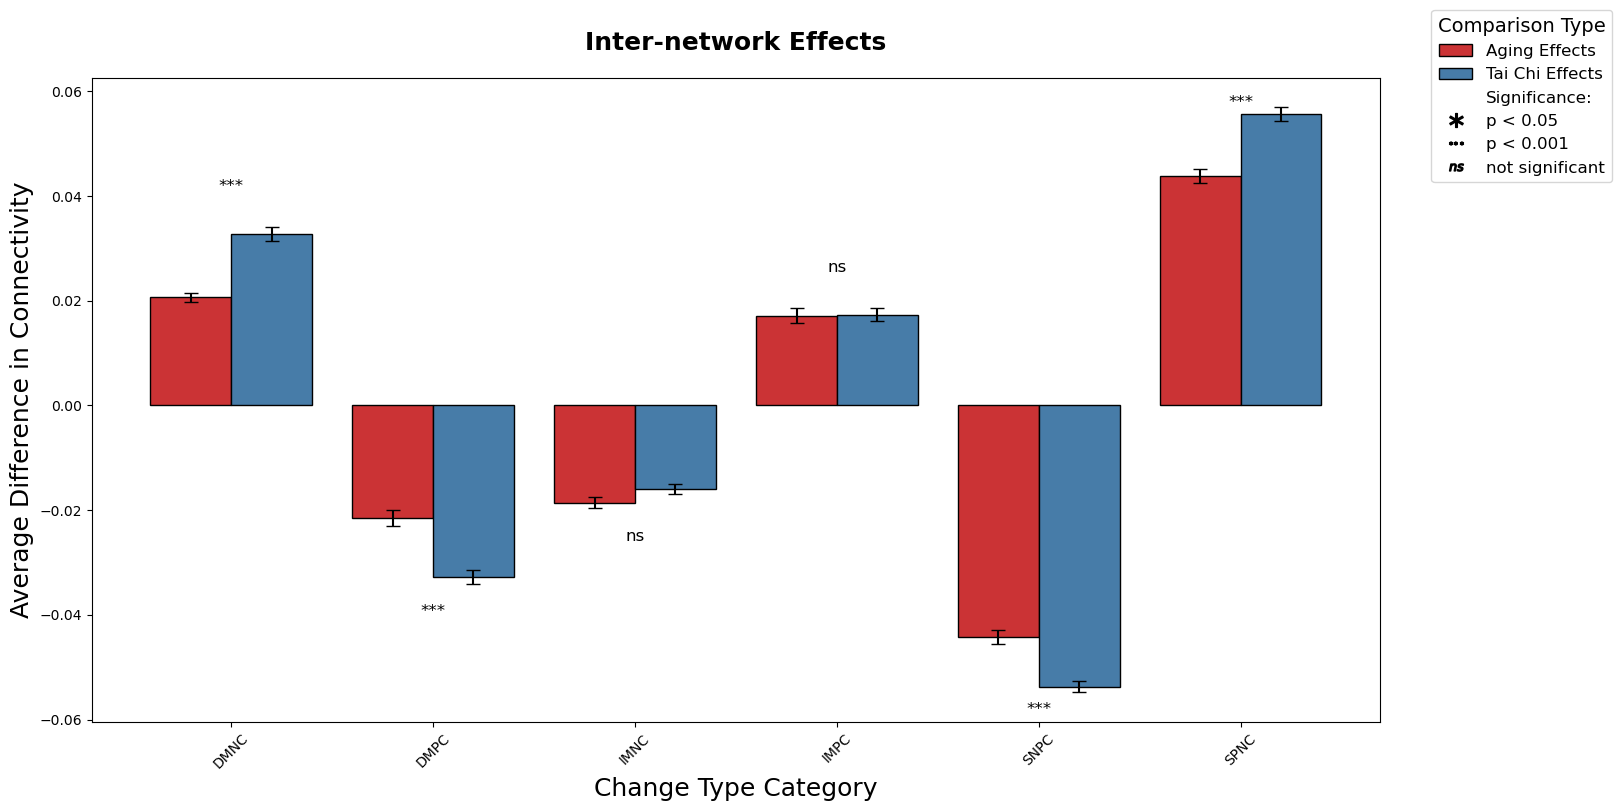

In [13]:
# Aggregate-level plots: Plotting Aging Effects vs Tai Chi Effects per category 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the results
results_df = pd.read_csv('wilcoxon_&_McNamar_test_results_by_network_type.csv')

def create_network_plot(data, connection_type, results_df, title):
    """
    Create a single network plot for specified connection type.
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create bar plot
    bars = sns.barplot(
        data=data,
        x='Change Type',
        y='Effect',
        hue='Comparison',
        palette=sns.color_palette("Set1", 2),
        errorbar=None,
        edgecolor='black',
        ax=ax
    )
    
    # Add error bars
    for idx, row in data.iterrows():
        bar = ax.patches[idx]
        height = bar.get_height()
        error = row['SE']
        
        ax.errorbar(
            bar.get_x() + bar.get_width()/2,
            height,
            yerr=error,
            color='black',
            capsize=5,
            capthick=1,
            fmt='none',
            zorder=10
        )
    
    # Get the y-axis limits
    ymin, ymax = ax.get_ylim()
    plot_range = ymax - ymin
    
    # Add significance markers
    change_types = data['Change Type'].unique()
    for ct in change_types:
        idx = list(change_types).index(ct)
        mask = (results_df['Change_Type'] == ct) & (results_df['Connection_Type'] == connection_type)
        if not mask.any():
            continue
            
        p_value = results_df.loc[mask, 'P_Value'].iloc[0]
        
        # Get y positions for the current change type
        ct_data = data[data['Change Type'] == ct]
        y_values = ct_data['Effect']
        y_errors = ct_data['SE']
        
        # Calculate marker position
        max_height = max(y_values + y_errors)
        min_height = min(y_values - y_errors)
        
        # Determine if bars are positive or negative
        if max_height > 0:
            # For positive bars, place marker above but within plot
            y_pos = min(max_height + (plot_range * 0.05), ymax - (plot_range * 0.05))
            va = 'bottom'
        else:
            # For negative bars, place marker below but within plot
            y_pos = max(min_height - (plot_range * 0.03), ymin + (plot_range * 0.03))
            va = 'top'
            
        # Add significance markers
        if p_value < 0.001:
            marker = '***'
        elif p_value < 0.05:
            marker = '*'
        else:
            marker = 'ns'
            
        ax.text(idx, y_pos, marker, ha='center', va=va, fontsize=12)
    
    # Customize plot
    ax.set_xlabel('Change Type Category', fontsize=18)
    ax.set_ylabel('Average Difference in Connectivity', fontsize=18)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_title(title, fontsize=18, fontweight='bold', pad=20)
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    significance_legend = [
        plt.Line2D([], [], marker='', linestyle='', label='Significance:'),
        plt.Line2D([], [], marker='$*$', linestyle='', markersize=10, label='p < 0.05', color='black'),
        plt.Line2D([], [], marker='$***$', linestyle='', markersize=10, 
           color='black', label='p < 0.001'),
        plt.Line2D([], [], marker='$ns$', linestyle='', markersize=10, color='black', label='not significant')
    ]
    
    # Remove default legend and add combined legend
    ax.get_legend().remove()
    fig.legend(handles + significance_legend, 
              labels + ['Significance:', 'p < 0.05', 'p < 0.001', 'not significant'],
              title='Comparison Type',
              bbox_to_anchor=(1.02, 0.9),
              loc='center left',
              fontsize=12,
              title_fontsize=14)
    
    plt.tight_layout()
    return fig

# Create and save separate plots for each connection type
for conn_type, title in zip(['all', 'intra', 'inter'],
                          ['Overall Network Effects',
                           'Intra-network Effects',
                           'Inter-network Effects']):
    
    # Filter data for current connection type
    conn_data = results_df[results_df['Connection_Type'] == conn_type].copy()
    
    # Verify we have data for this connection type
    if len(conn_data) == 0:
        print(f"No data found for connection type: {conn_type}")
        continue
        
    # Prepare data for plotting
    plot_data = []
    for _, row in conn_data.iterrows():
        # Add Aging Effects
        plot_data.append({
            'Change Type': row['Change_Type'].upper(),
            'Comparison': 'Aging Effects',
            'Effect': row['Aging_Effect'],
            'SE': row['Aging_SE']
        })
        # Add Tai Chi Effects
        plot_data.append({
            'Change Type': row['Change_Type'].upper(),
            'Comparison': 'Tai Chi Effects',
            'Effect': row['TaiChi_Effect'],
            'SE': row['TaiChi_SE']
        })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Create and save plot
    fig = create_network_plot(plot_df, conn_type, results_df, title)
    fig.savefig(f'network_effects_{conn_type}.png', 
                dpi=300, 
                bbox_inches='tight',
                facecolor='white')
    #plt.close(fig)

In [44]:
# Network-Specific Wilcoxon Signed Rank Test Analysis

import pandas as pd
import numpy as np
from scipy import stats
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def get_change_type_dfs(loaded_data):
    """
    Organize loaded DataFrames by change type and comparison.
    """
    change_types_data = {}
    
    for sheet_name, df in loaded_data.items():
        if '_summary' in sheet_name:
            continue
            
        if 'oac_vs_yac' in sheet_name:
            comparison = 'oac_vs_yac'
        elif 'oac_vs_tcoa' in sheet_name:
            comparison = 'oac_vs_tcoa'
        else:
            continue
            
        for ct in ['impc', 'dmnc', 'snpc', 'imnc', 'dmpc', 'spnc']:
            if f'_{ct}' in sheet_name:
                if ct not in change_types_data:
                    change_types_data[ct] = {}
                change_types_data[ct][comparison] = df
                break
    
    return change_types_data

def create_unique_connection_id(row):
    """
    Create a unique connection ID that matches the original analysis method.
    Includes region pair, state window, and mode information.
    """
    regions = sorted([row['Region1'], row['Region2']])
    return f"{regions[0]}_{regions[1]}_{row['State_Window']}_{row['Mode']}"

def match_connections_by_network_pair(aging_df, taichi_df, network_pair):
    """
    Match connections between aging and tai chi comparisons for a specific network pair.
    Prevents double-counting by using unique connection IDs.
    """
    if aging_df is None or taichi_df is None:
        return None, None
    
    if 'Network_Pair' not in aging_df.columns or 'Network_Pair' not in taichi_df.columns:
        return None, None
    
    # Filter by network pair
    aging_filtered = aging_df[aging_df['Network_Pair'] == network_pair].copy()
    taichi_filtered = taichi_df[taichi_df['Network_Pair'] == network_pair].copy()
    
    if aging_filtered.empty or taichi_filtered.empty:
        return None, None
    
    # Create unique connection IDs (network-based, not window-based)
    aging_filtered['conn_id'] = aging_filtered.apply(create_unique_connection_id, axis=1)
    taichi_filtered['conn_id'] = taichi_filtered.apply(create_unique_connection_id, axis=1)
    
    # Get unique connection IDs (to prevent double-counting across different windows)
    aging_unique = aging_filtered.drop_duplicates('conn_id').copy()
    taichi_unique = taichi_filtered.drop_duplicates('conn_id').copy()
    
    # Find common connections
    common_conns = set(aging_unique['conn_id']) & set(taichi_unique['conn_id'])
    
    if not common_conns:
        return None, None
    
    # Filter to common connections
    aging_matched = aging_unique[aging_unique['conn_id'].isin(common_conns)].copy()
    taichi_matched = taichi_unique[taichi_unique['conn_id'].isin(common_conns)].copy()
    
    # Ensure same ordering
    aging_matched = aging_matched.sort_values('conn_id').reset_index(drop=True)
    taichi_matched = taichi_matched.sort_values('conn_id').reset_index(drop=True)
    
    return aging_matched, taichi_matched

def get_mechanism_counts(taichi_df_full, network_pair):
    """
    Get counts for each mechanism type for a specific network pair.
    Works with the full dataset (not just matched connections).
    """
    if taichi_df_full is None or taichi_df_full.empty:
        return {}
    
    # Filter by network pair
    taichi_filtered = taichi_df_full[taichi_df_full['Network_Pair'] == network_pair].copy()
    
    if taichi_filtered.empty:
        return {}
    
    # Create unique connection IDs to avoid double-counting
    taichi_filtered['conn_id'] = taichi_filtered.apply(create_unique_connection_id, axis=1)
    
    # Get unique connections
    taichi_unique = taichi_filtered.drop_duplicates('conn_id')
    
    # Initialize counts dictionary
    mechanism_counts = {}
    
    # Check for different mechanism columns and count them
    mechanism_types = [
        'Restoration', 'Alternative', 'Normalization', 'Enhancement',
        'Deterioration', 'Maladaptive', 'Exacerbation', 'Decompensation'
    ]
    
    for mech in mechanism_types:
        if mech in taichi_unique.columns:
            count = taichi_unique[mech].sum()
            if count > 0:  # Only include non-zero counts
                mechanism_counts[f'{mech}_Count'] = count
    
    return mechanism_counts

def interpret_cohens_d(aging_effect, taichi_effect, cohens_d):
    """
    Interpret the direction of Cohen's d effect using absolute magnitudes.
    """
    if abs(taichi_effect) > abs(aging_effect):
        return "TC effects larger than aging effects"
    elif abs(aging_effect) > abs(taichi_effect):
        return "Aging effects larger than TC effects"
    else:
        return "No difference between effects"

def perform_network_specific_statistical_comparison(aging_df, taichi_df, network_pair, min_connections=5):
    """
    Perform Wilcoxon signed-rank test on matched connections for a specific network pair.
    Only performs test if there are at least min_connections matched connections.
    """
    aging_matched, taichi_matched = match_connections_by_network_pair(aging_df, taichi_df, network_pair)
    
    if aging_matched is None or taichi_matched is None or len(aging_matched) == 0:
        return None
    
    n_connections = len(aging_matched)
    
    # Get mechanism counts from full taichi dataset
    mechanism_counts = get_mechanism_counts(taichi_df, network_pair)
    
    # Basic result with connection count and network info
    result = {
        'Network_Pair': network_pair,
        'N_Connections': n_connections,
        'Region1': aging_matched['Region1'].iloc[0],
        'Region2': aging_matched['Region2'].iloc[0],
    }
    
    # Add mechanism counts
    result.update(mechanism_counts)
    
    # Only perform statistical test if enough connections
    if n_connections >= min_connections:
        aging_diffs = aging_matched['Difference'].values
        taichi_diffs = taichi_matched['Difference'].values
        
        # Calculate Wilcoxon signed-rank test
        stat, p_value = stats.wilcoxon(aging_diffs, taichi_diffs)
        
        # Calculate mean effects
        aging_effect = np.mean(aging_diffs)
        taichi_effect = np.mean(taichi_diffs)
        
        # Calculate Cohen's d using absolute differences
        difference_scores = abs(aging_diffs) - abs(taichi_diffs)
        cohens_d = np.mean(difference_scores) / np.std(difference_scores, ddof=1)
        
        # Add statistical results to output
        result.update({
            'W_Statistic': stat,
            'P_Value': p_value,
            'Cohens_D': cohens_d,
            'Cohens_D_Interpretation': interpret_cohens_d(aging_effect, taichi_effect, cohens_d),
            'Aging_Effect': aging_effect,
            'Aging_SE': stats.sem(aging_diffs),
            'TaiChi_Effect': taichi_effect,
            'TaiChi_SE': stats.sem(taichi_diffs)
        })
    else:
        # For connections with insufficient data
        result.update({
            'W_Statistic': np.nan,
            'P_Value': np.nan,
            'Cohens_D': np.nan,
            'Cohens_D_Interpretation': "Insufficient connections (N < 5)",
            'Aging_Effect': np.nan if n_connections == 0 else np.mean(aging_matched['Difference'].values),
            'Aging_SE': np.nan if n_connections == 0 else stats.sem(aging_matched['Difference'].values),
            'TaiChi_Effect': np.nan if n_connections == 0 else np.mean(taichi_matched['Difference'].values),
            'TaiChi_SE': np.nan if n_connections == 0 else stats.sem(taichi_matched['Difference'].values)
        })
    
    return result

def determine_connection_type(network_pair):
    """
    Determine if a network pair represents intra- or inter-network connections.
    """
    networks = network_pair.split('-')
    return 'intra' if networks[0] == networks[1] else 'inter'

def run_comprehensive_network_specific_analysis(change_types_data):
    """
    Run the network-specific analysis for all change types and network pairs.
    Enhanced to include State_Windows and Modes columns in the results.
    """
    all_results = []
    
    # First, get all unique network pairs across all datasets
    all_network_pairs = set()
    for ct, data in change_types_data.items():
        for comparison, df in data.items():
            if 'Network_Pair' in df.columns:
                all_network_pairs.update(df['Network_Pair'].unique())
    
    all_network_pairs = sorted(list(all_network_pairs))
    print(f"Found {len(all_network_pairs)} unique network pairs across all datasets")
    
    # Now run analysis for each change type and network pair
    for ct, data in change_types_data.items():
        if 'oac_vs_yac' not in data or 'oac_vs_tcoa' not in data:
            print(f"Skipping {ct} - missing required comparison data")
            continue
            
        print(f"\nProcessing {ct.upper()}")
        
        for network_pair in all_network_pairs:
            print(f"  Analyzing {network_pair}...", end="\r")
            
            result = perform_network_specific_statistical_comparison(
                data['oac_vs_yac'],
                data['oac_vs_tcoa'],
                network_pair
            )
            
            if result:
                result['Change_Type'] = ct.upper()
                result['Connection_Type'] = determine_connection_type(network_pair)
                
                # Extract unique State_Windows from both datasets
                state_windows = set()
                modes = set()
                
                for comparison in ['oac_vs_yac', 'oac_vs_tcoa']:
                    df = data[comparison]
                    
                    # Try to extract State_Windows
                    if 'State_Window' in df.columns:
                        state_windows.update(str(sw).strip() for sw in df['State_Window'].unique() if pd.notna(sw))
                    
                    # Try to extract Modes
                    if 'Mode' in df.columns:
                        modes.update(str(mode).strip() for mode in df['Mode'].unique() if pd.notna(mode))
                
                # Add State_Windows and Modes to result
                result['State_Windows'] = ','.join(sorted(state_windows)) if state_windows else 'Unknown'
                result['Modes'] = ','.join(sorted(modes)) if modes else 'Unknown'
                
                all_results.append(result)
        
        print(" " * 80, end="\r")  # Clear the last status message
        print(f"Completed {ct.upper()} - found {sum(1 for r in all_results if r['Change_Type'] == ct.upper())} network pairs with matching connections")
    
    # Check if we have any results
    if not all_results:
        print("No matching connections found in any change type")
        return pd.DataFrame()
    
    # Convert to DataFrame
    results_df = pd.DataFrame(all_results)
    
    # Define preferred column order with all possible columns
    preferred_columns = [
        'Change_Type', 'Connection_Type', 'Network_Pair', 'N_Connections',
        'Region1', 'Region2', 'State_Windows', 'Modes',  # Added State_Windows and Modes
        'W_Statistic', 'P_Value', 'Cohens_D', 
        'Cohens_D_Interpretation', 'Aging_Effect', 'Aging_SE', 'TaiChi_Effect', 'TaiChi_SE'
    ]
    
    # Add mechanism count columns if they exist (in consistent order)
    mechanism_columns = [
        'Restoration_Count', 'Alternative_Count', 'Normalization_Count', 'Enhancement_Count',
        'Deterioration_Count', 'Maladaptive_Count', 'Exacerbation_Count', 'Decompensation_Count'
    ]
    
    # Only include mechanism columns that exist in results
    for col in mechanism_columns:
        if col in results_df.columns:
            preferred_columns.append(col)
    
    # Only include columns that exist in the DataFrame
    existing_columns = [col for col in preferred_columns if col in results_df.columns]
    results_df = results_df[existing_columns]
    
    return results_df

def verify_connection_counts(results_df, original_results_path='wilcoxon_&_McNamar_test_results_by_network_type.csv'):
    """
    Verify that the network-specific connection counts match the original aggregated results.
    """
    try:
        original_results = pd.read_csv(original_results_path)
        print("\nVerifying connection counts against original results:")
        
        for change_type in results_df['Change_Type'].unique():
            # Get intra and inter connection counts from new results
            new_intra = results_df[(results_df['Change_Type'] == change_type) & 
                                   (results_df['Connection_Type'] == 'intra')]['N_Connections'].sum()
            new_inter = results_df[(results_df['Change_Type'] == change_type) & 
                                   (results_df['Connection_Type'] == 'inter')]['N_Connections'].sum()
            new_all = new_intra + new_inter
            
            # Get original counts
            orig_all = original_results[(original_results['Change_Type'] == change_type) & 
                                        (original_results['Connection_Type'] == 'all')]['N_Connections'].iloc[0]
            orig_intra = original_results[(original_results['Change_Type'] == change_type) & 
                                          (original_results['Connection_Type'] == 'intra')]['N_Connections'].iloc[0]
            orig_inter = original_results[(original_results['Change_Type'] == change_type) & 
                                          (original_results['Connection_Type'] == 'inter')]['N_Connections'].iloc[0]
            
            print(f"\n{change_type}:")
            print(f"  Intra-network: {new_intra} (Original: {orig_intra}) - {'Match' if new_intra == orig_intra else 'Mismatch'}")
            print(f"  Inter-network: {new_inter} (Original: {orig_inter}) - {'Match' if new_inter == orig_inter else 'Mismatch'}")
            print(f"  All connections: {new_all} (Original: {orig_all}) - {'Match' if new_all == orig_all else 'Mismatch'}")
            
    except Exception as e:
        print(f"Could not verify counts against original results: {str(e)}")


# Main execution
print("Starting Network-Specific Wilcoxon Signed Rank Test Analysis")

# Make sure loaded_data exists
if 'loaded_data' not in globals():
    print("Error: 'loaded_data' not found. Please run the data loading script first.")
else:
    # Get organized data by change type
    print("\nOrganizing loaded data by change type...")
    change_types_data = get_change_type_dfs(loaded_data)
    
    # Run the analysis
    print("\nRunning network-specific analysis...")
    network_specific_results = run_comprehensive_network_specific_analysis(change_types_data)
    
    if not network_specific_results.empty:
        # Save the results
        output_file = 'network_specific_wilcoxon_results_FINAL.csv'
        network_specific_results.to_csv(output_file, index=False)
        print(f"\nResults saved to '{output_file}'")
        
        # Verify connection counts if possible
        verify_connection_counts(network_specific_results)
        
        # Display summary of significant results
        print("\nSummary of significant results:")
        significant_results = network_specific_results[
            (~network_specific_results['P_Value'].isna()) & 
            (network_specific_results['P_Value'] < 0.05)
        ]
        
        if not significant_results.empty:
            print(f"Found {len(significant_results)} significant network pairs (p < 0.05)")
            for ct in significant_results['Change_Type'].unique():
                ct_results = significant_results[significant_results['Change_Type'] == ct]
                print(f"\n{ct}: {len(ct_results)} significant network pairs")
                
                for conn_type in ['intra', 'inter']:
                    type_results = ct_results[ct_results['Connection_Type'] == conn_type]
                    if not type_results.empty:
                        print(f"  {conn_type.capitalize()}-network: {len(type_results)} significant pairs")
                        for _, row in type_results.iterrows():
                            print(f"    {row['Network_Pair']} (p={row['P_Value']:.4f}, d={row['Cohens_D']:.4f})")
        else:
            print("No significant results found (p < 0.05)")
    else:
        print("No results generated. Please check your data.")

Starting Network-Specific Wilcoxon Signed Rank Test Analysis

Organizing loaded data by change type...

Running network-specific analysis...
Found 49 unique network pairs across all datasets

Processing DMNC
Completed DMNC - found 44 network pairs with matching connections               

Processing DMPC
Completed DMPC - found 45 network pairs with matching connections               

Processing IMNC
Completed IMNC - found 35 network pairs with matching connections               

Processing IMPC
Completed IMPC - found 33 network pairs with matching connections               

Processing SNPC
Completed SNPC - found 47 network pairs with matching connections               

Processing SPNC
Completed SPNC - found 47 network pairs with matching connections               

Results saved to 'network_specific_wilcoxon_results_FINAL.csv'

Verifying connection counts against original results:

DMNC:
  Intra-network: 52 (Original: 52) - Match
  Inter-network: 303 (Original: 303) - Match
  All c

Loading results from network_specific_wilcoxon_results_FINAL.csv...

Loaded 251 network-specific results
Change types: DMNC, DMPC, IMNC, IMPC, SNPC, SPNC

Applying FDR correction by change type:
  DMNC: 6/44 (13.64%) significant before correction, 0/44 (0.00%) after correction
  DMPC: 3/45 (6.67%) significant before correction, 1/45 (2.22%) after correction
  IMNC: 1/35 (2.86%) significant before correction, 0/35 (0.00%) after correction
  IMPC: 0/33 (0.00%) significant before correction, 0/33 (0.00%) after correction
  SNPC: 4/47 (8.51%) significant before correction, 1/47 (2.13%) after correction
  SPNC: 10/47 (21.28%) significant before correction, 5/47 (10.64%) after correction

Total: 24/251 (9.56%) significant before correction, 7/251 (2.79%) after correction


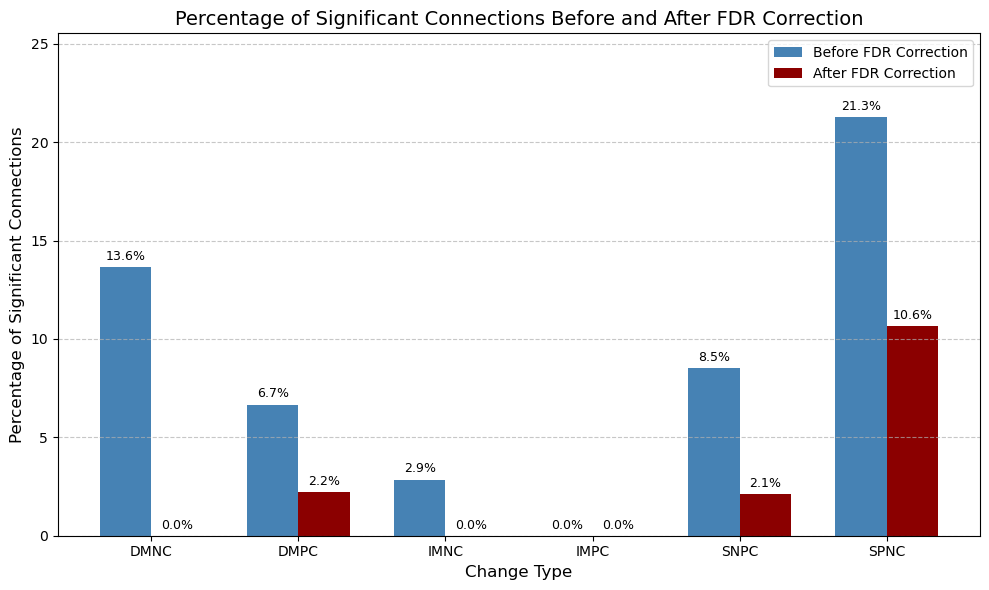

Bar graph saved to significance_percentages.png

Updated results saved to 'network_specific_wilcoxon_results_FDR_corrected.csv'


In [29]:
# FDR Correction and Bar Graph Visualization for Network-Specific Wilcoxon Results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import os

def apply_fdr_correction_by_change_type(results_df, alpha=0.05):
    """
    Apply FDR (Benjamini-Hochberg) correction to p-values within each change type.
    Adds a P_Value_Corrected column to the DataFrame.
    Returns the updated DataFrame and statistics on significant connections.
    """
    # Create column for corrected p-values
    results_df['P_Value_Corrected'] = np.nan
    
    # Get all unique change types
    change_types = results_df['Change_Type'].unique()
    
    # Dictionary to track counts for visualization
    stats = {
        'change_type': [],
        'total_connections': [],
        'sig_before': [],
        'sig_after': [],
        'percent_before': [],
        'percent_after': []
    }
    
    print("\nApplying FDR correction by change type:")
    
    for ct in change_types:
        # Get rows for this change type
        ct_mask = results_df['Change_Type'] == ct
        ct_count = ct_mask.sum()
        
        # Get rows with valid p-values
        valid_mask = ct_mask & (~results_df['P_Value'].isna())
        valid_count = valid_mask.sum()
        
        if valid_count == 0:
            print(f"  {ct}: No valid p-values to correct")
            # Add zeros for this change type
            stats['change_type'].append(ct)
            stats['total_connections'].append(ct_count)
            stats['sig_before'].append(0)
            stats['sig_after'].append(0)
            stats['percent_before'].append(0)
            stats['percent_after'].append(0)
            continue
        
        # Get p-values for this change type
        p_values = results_df.loc[valid_mask, 'P_Value'].values
        
        # Count significant before correction
        sig_before = (p_values < alpha).sum()
        
        # Apply FDR correction
        rejected, p_corrected = fdrcorrection(p_values, alpha=alpha, method='indep')
        
        # Count significant after correction
        sig_after = rejected.sum()
        
        # Update corrected p-values in the DataFrame
        results_df.loc[valid_mask, 'P_Value_Corrected'] = p_corrected
        
        # Calculate percentages
        percent_before = (sig_before / ct_count) * 100
        percent_after = (sig_after / ct_count) * 100
        
        # Add to stats
        stats['change_type'].append(ct)
        stats['total_connections'].append(ct_count)
        stats['sig_before'].append(sig_before)
        stats['sig_after'].append(sig_after)
        stats['percent_before'].append(percent_before)
        stats['percent_after'].append(percent_after)
        
        print(f"  {ct}: {sig_before}/{ct_count} ({percent_before:.2f}%) significant before correction, "
              f"{sig_after}/{ct_count} ({percent_after:.2f}%) after correction")
    
    # Calculate overall percentages
    total_connections = sum(stats['total_connections'])
    total_sig_before = sum(stats['sig_before'])
    total_sig_after = sum(stats['sig_after'])
    
    overall_percent_before = (total_sig_before / total_connections) * 100
    overall_percent_after = (total_sig_after / total_connections) * 100
    
    print(f"\nTotal: {total_sig_before}/{total_connections} ({overall_percent_before:.2f}%) significant before correction, "
          f"{total_sig_after}/{total_connections} ({overall_percent_after:.2f}%) after correction")
    
    return results_df, stats

def create_significance_bar_graph(stats, output_file="significance_percentages.png", show_plot=True):
    """
    Create a bar graph showing the percentage of significant connections before and after FDR correction.
    """
    # Prepare data for visualization
    change_types = stats['change_type']
    percent_before = stats['percent_before']
    percent_after = stats['percent_after']
    
    # Sort change types alphabetically
    sorted_indices = np.argsort(change_types)
    change_types = [change_types[i] for i in sorted_indices]
    percent_before = [percent_before[i] for i in sorted_indices]
    percent_after = [percent_after[i] for i in sorted_indices]
    
    # Calculate positions for grouped bars
    x = np.arange(len(change_types))
    width = 0.35
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars
    bar1 = ax.bar(x - width/2, percent_before, width, label='Before FDR Correction', color='steelblue')
    bar2 = ax.bar(x + width/2, percent_after, width, label='After FDR Correction', color='darkred')
    
    # Add value labels on top of bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=9)
    
    add_labels(bar1)
    add_labels(bar2)
    
    # Customize chart
    ax.set_xlabel('Change Type', fontsize=12)
    ax.set_ylabel('Percentage of Significant Connections', fontsize=12)
    ax.set_title('Percentage of Significant Connections Before and After FDR Correction', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(change_types)
    ax.legend()
    
    # Add grid for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Set y-axis to go from 0 to a reasonable upper limit
    max_percent = max(max(percent_before), max(percent_after))
    ax.set_ylim(0, min(100, max_percent * 1.2))  # Cap at 100%, otherwise add 20% margin
    
    # Tight layout
    plt.tight_layout()
    
    # Save figure
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    
    if show_plot:
        plt.show()
    else:
        plt.close()
    
    print(f"Bar graph saved to {output_file}")

def main():
    """
    Main function to load results, apply FDR correction, and generate bar graph.
    """
    # Load the network-specific results
    input_file = 'network_specific_wilcoxon_results_FINAL.csv'
    if not os.path.exists(input_file):
        print(f"Error: Input file '{input_file}' not found.")
        return
    
    print(f"Loading results from {input_file}...")
    results_df = pd.read_csv(input_file)
    
    # Print initial summary
    print(f"\nLoaded {len(results_df)} network-specific results")
    print(f"Change types: {', '.join(sorted(results_df['Change_Type'].unique()))}")
    
    # Apply FDR correction and get statistics
    results_df, stats = apply_fdr_correction_by_change_type(results_df)
    
    # Generate and display bar graph
    create_significance_bar_graph(stats)
    
    # Save updated results with corrected p-values
    output_file = 'network_specific_wilcoxon_results_FDR_corrected.csv'
    results_df.to_csv(output_file, index=False)
    print(f"\nUpdated results saved to '{output_file}'")

if __name__ == "__main__":
    main()


Starting analysis at 12:25:14
Created output directory: mechanism_analysis_results

Processing data...
Calculating and saving summaries...

Generating heatmaps and ratio matrices...
1/3: Creating Compensatory vs Detrimental balance heatmap...
2/3: Creating Compensatory proportion heatmap...
3/3: Creating Detrimental proportion heatmap...

Analysis complete at 12:25:15
All files saved to: /home/cerna3/neuroconn/Analyses/mechanism_analysis_results


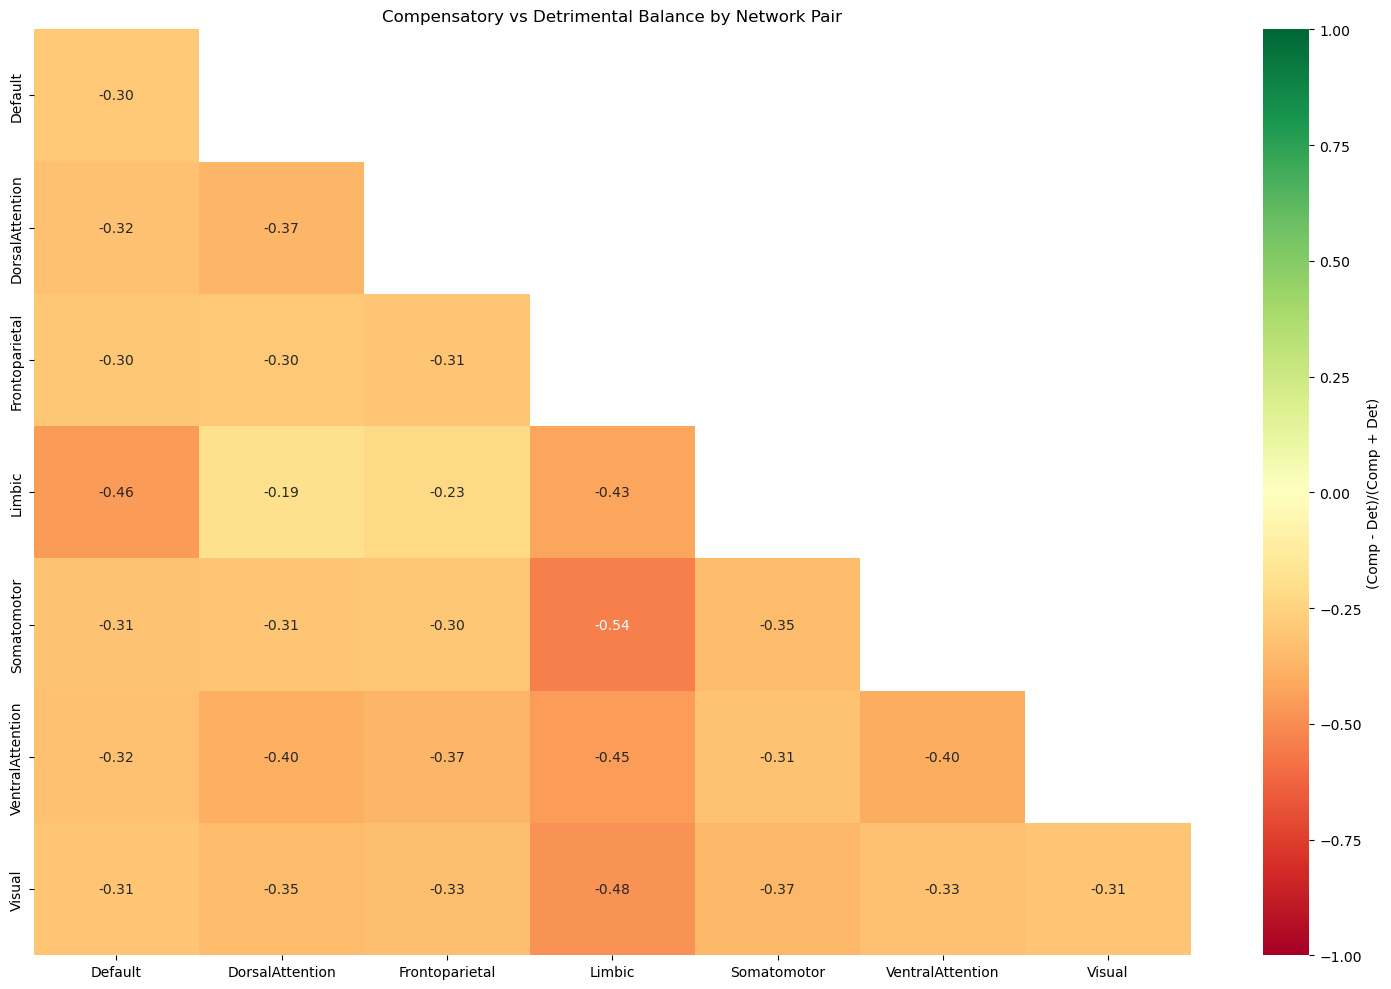

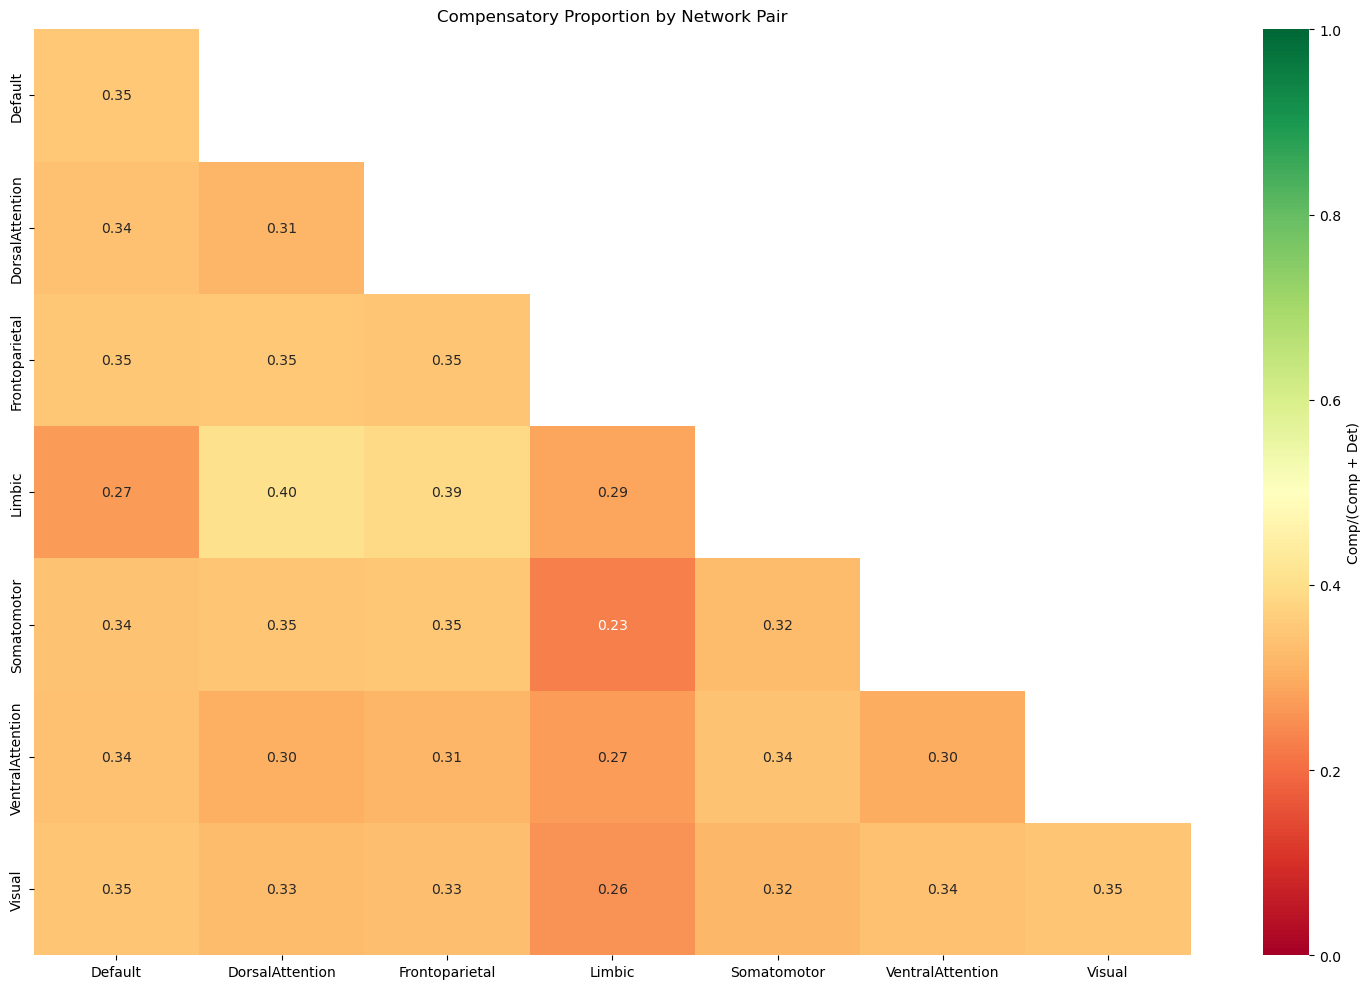

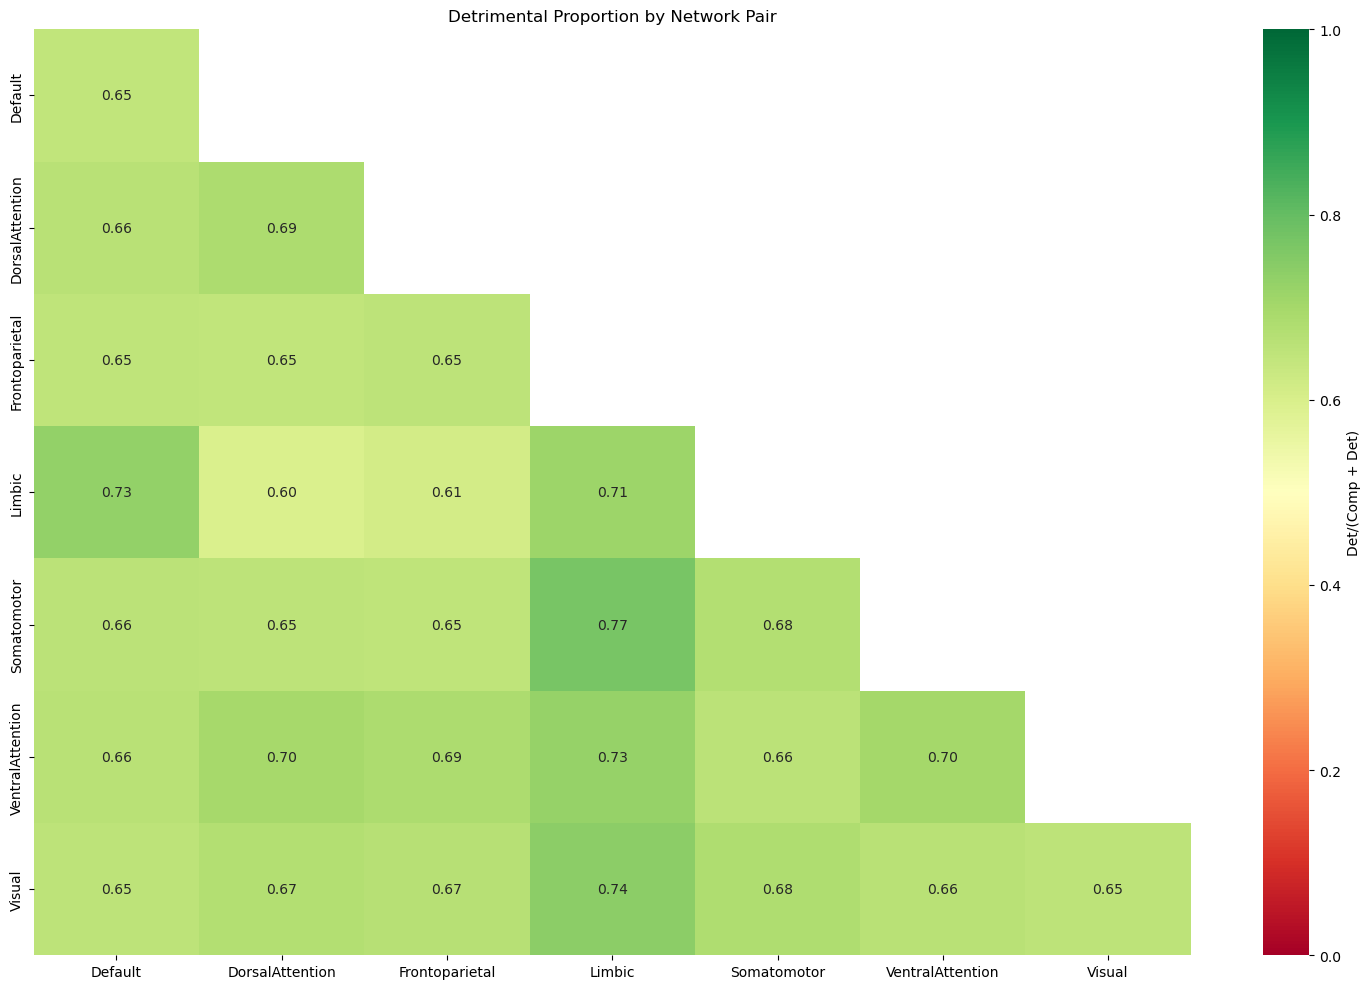

In [18]:
# Mechanism Count + Heatmaps

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def create_comprehensive_mechanism_analysis(results_df, output_dir='mechanism_analysis'):
    """
    Create comprehensive mechanism analysis with multiple ratio calculations:
    1. Balance ratio: (Comp - Det)/(Comp + Det) [-1 to +1]
    2. Compensatory proportion: Comp/(Comp + Det) [0 to 1]
    3. Detrimental proportion: Det/(Comp + Det) [0 to 1]
    """
    print(f"\nStarting analysis at {datetime.now().strftime('%H:%M:%S')}")
    
    os.makedirs(output_dir, exist_ok=True)
    print(f"Created output directory: {output_dir}")

    print("\nProcessing data...")
    df = results_df.copy()
    
    # Ensure that all mechanism count columns exist; if not, fill with 0
    for col in ['Restoration_Count', 'Alternative_Count', 'Normalization_Count', 'Enhancement_Count']:
        if col not in df.columns:
            df[col] = 0
    for col in ['Deterioration_Count', 'Maladaptive_Count', 'Exacerbation_Count', 'Decompensation_Count']:
        if col not in df.columns:
            df[col] = 0

    # Aggregate compensatory and detrimental counts based on your updated definitions:
    df['Total_Compensatory'] = (df['Restoration_Count'] + df['Alternative_Count'] + 
                                df['Normalization_Count'] + df['Enhancement_Count'])
    df['Total_Detrimental'] = (df['Deterioration_Count'] + df['Maladaptive_Count'] + 
                               df['Exacerbation_Count'] + df['Decompensation_Count'])
    
    df['Is_Within'] = df['Network_Pair'].apply(lambda x: x.split('-')[0] == x.split('-')[1])

    # Save summaries
    print("Calculating and saving summaries...")
    compensatory_mechanisms = ['Restoration_Count', 'Alternative_Count', 'Normalization_Count', 'Enhancement_Count']
    detrimental_mechanisms = ['Deterioration_Count', 'Maladaptive_Count', 'Exacerbation_Count', 'Decompensation_Count']

    change_type_summary = df.groupby('Change_Type')[compensatory_mechanisms + detrimental_mechanisms].sum()
    network_type_summary = df.groupby(['Is_Within', 'Change_Type'])[compensatory_mechanisms + detrimental_mechanisms].sum()
    network_pair_summary = df.groupby(['Network_Pair', 'Change_Type'])[compensatory_mechanisms + detrimental_mechanisms].sum()

    change_type_summary.to_csv(os.path.join(output_dir, 'change_type_mechanism_summary.csv'))
    network_type_summary.to_csv(os.path.join(output_dir, 'network_type_mechanism_summary.csv'))
    network_pair_summary.to_csv(os.path.join(output_dir, 'network_pair_mechanism_summary.csv'))

    # Get unique networks from Network_Pair values (splitting on '-')
    networks = sorted(list({net for pair in df['Network_Pair'].str.split('-') for net in pair}))
    
    print("\nGenerating heatmaps and ratio matrices...")
    
    # --- Balance ratio (Comp - Det)/(Comp + Det) [-1 to 1] ---
    print("1/3: Creating Compensatory vs Detrimental balance heatmap...")
    ratio_matrix_comp_det = pd.DataFrame(index=networks, columns=networks, dtype=float)
    _calculate_balance_ratio_matrix(df, ratio_matrix_comp_det, 'Total_Compensatory', 'Total_Detrimental')
    fig1 = _create_and_save_heatmap(ratio_matrix_comp_det, output_dir, 
                            'Compensatory vs Detrimental Balance by Network Pair', 
                            'comp_det',
                            center=0, vmin=-1, vmax=1,
                            label='(Comp - Det)/(Comp + Det)')
    ratio_matrix_comp_det.to_csv(os.path.join(output_dir, 'network_pair_comp_det_ratios.csv'))

    # --- Proportion ratio Comp/(Comp + Det) [0 to 1] ---
    print("2/3: Creating Compensatory proportion heatmap...")
    ratio_matrix_comp_total = pd.DataFrame(index=networks, columns=networks, dtype=float)
    _calculate_proportion_ratio_matrix(df, ratio_matrix_comp_total, 'Total_Compensatory', 'Total_Detrimental')
    fig2 = _create_and_save_heatmap(ratio_matrix_comp_total, output_dir, 
                            'Compensatory Proportion by Network Pair', 
                            'comp_total',
                            center=0.5, vmin=0, vmax=1,
                            label='Comp/(Comp + Det)')
    ratio_matrix_comp_total.to_csv(os.path.join(output_dir, 'network_pair_comp_total_ratios.csv'))

    # --- Proportion ratio Det/(Comp + Det) [0 to 1] ---
    print("3/3: Creating Detrimental proportion heatmap...")
    ratio_matrix_det_total = pd.DataFrame(index=networks, columns=networks, dtype=float)
    _calculate_proportion_ratio_matrix(df, ratio_matrix_det_total, 'Total_Detrimental', 'Total_Compensatory')
    fig3 = _create_and_save_heatmap(ratio_matrix_det_total, output_dir, 
                            'Detrimental Proportion by Network Pair', 
                            'det_total',
                            center=0.5, vmin=0, vmax=1,
                            label='Det/(Comp + Det)')
    ratio_matrix_det_total.to_csv(os.path.join(output_dir, 'network_pair_det_total_ratios.csv'))

    print(f"\nAnalysis complete at {datetime.now().strftime('%H:%M:%S')}")
    print(f"All files saved to: {os.path.abspath(output_dir)}")
    
    plt.show()
    return change_type_summary, network_type_summary, network_pair_summary

def _calculate_balance_ratio_matrix(df, ratio_matrix, mech1, mech2):
    """Calculate ratio matrix using (Mech1 - Mech2)/(Mech1 + Mech2) formula"""
    for network_pair in df['Network_Pair'].unique():
        net1, net2 = network_pair.split('-')
        subset = df[df['Network_Pair'] == network_pair]
        mech1_sum = float(subset[mech1].sum())
        mech2_sum = float(subset[mech2].sum())
        total = mech1_sum + mech2_sum

        if total == 0:
            ratio_matrix.loc[net1, net2] = np.nan
            if net1 != net2:
                ratio_matrix.loc[net2, net1] = np.nan
        else:
            ratio = (mech1_sum - mech2_sum) / total
            ratio_matrix.loc[net1, net2] = ratio
            if net1 != net2:
                ratio_matrix.loc[net2, net1] = ratio

def _calculate_proportion_ratio_matrix(df, ratio_matrix, mech1, mech2):
    """Calculate ratio matrix using Mech1/(Mech1 + Mech2) formula"""
    for network_pair in df['Network_Pair'].unique():
        net1, net2 = network_pair.split('-')
        subset = df[df['Network_Pair'] == network_pair]
        mech1_sum = float(subset[mech1].sum())
        mech2_sum = float(subset[mech2].sum())
        total = mech1_sum + mech2_sum

        if total == 0:
            ratio_matrix.loc[net1, net2] = np.nan
            if net1 != net2:
                ratio_matrix.loc[net2, net1] = np.nan
        else:
            ratio = mech1_sum / total
            ratio_matrix.loc[net1, net2] = ratio
            if net1 != net2:
                ratio_matrix.loc[net2, net1] = ratio

def _create_and_save_heatmap(ratio_matrix, output_dir, title, filename_prefix, center=0, vmin=-1, vmax=1, label='Ratio'):
    """Create and save heatmap with specified value range"""
    mask = np.triu(np.ones_like(ratio_matrix, dtype=bool), k=1)
    
    fig = plt.figure(figsize=(15, 10))
    
    sns.heatmap(ratio_matrix, 
                cmap='RdYlGn',
                center=center,
                vmin=vmin,
                vmax=vmax,
                annot=True, 
                fmt=".2f",
                cbar_kws={'label': label},
                mask=mask)
    
    plt.title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'{filename_prefix}_heatmap.png'))
    
    return fig

# Usage:
summaries = create_comprehensive_mechanism_analysis(network_specific_results, 
                                                   output_dir='mechanism_analysis_results')

Generating change type specific heatmaps...
Processing DMNC...
Saved heatmap to network_heatmaps_output/DMNC_network_heatmap.png
Processing DMPC...
Saved heatmap to network_heatmaps_output/DMPC_network_heatmap.png
Processing IMNC...
Saved heatmap to network_heatmaps_output/IMNC_network_heatmap.png
Processing IMPC...
Saved heatmap to network_heatmaps_output/IMPC_network_heatmap.png
Processing SNPC...
Saved heatmap to network_heatmaps_output/SNPC_network_heatmap.png
Processing SPNC...
Saved heatmap to network_heatmaps_output/SPNC_network_heatmap.png
All heatmaps saved to network_heatmaps_output
Generating summary heatmap...
Saved summary heatmap to network_heatmaps_output/summary_network_heatmap.png
Generating mechanism-specific heatmaps...
Saved restoration heatmap to network_heatmaps_output/restoration_network_heatmap.png
Saved alternative heatmap to network_heatmaps_output/alternative_network_heatmap.png
Saved normalization heatmap to network_heatmaps_output/normalization_network_heat

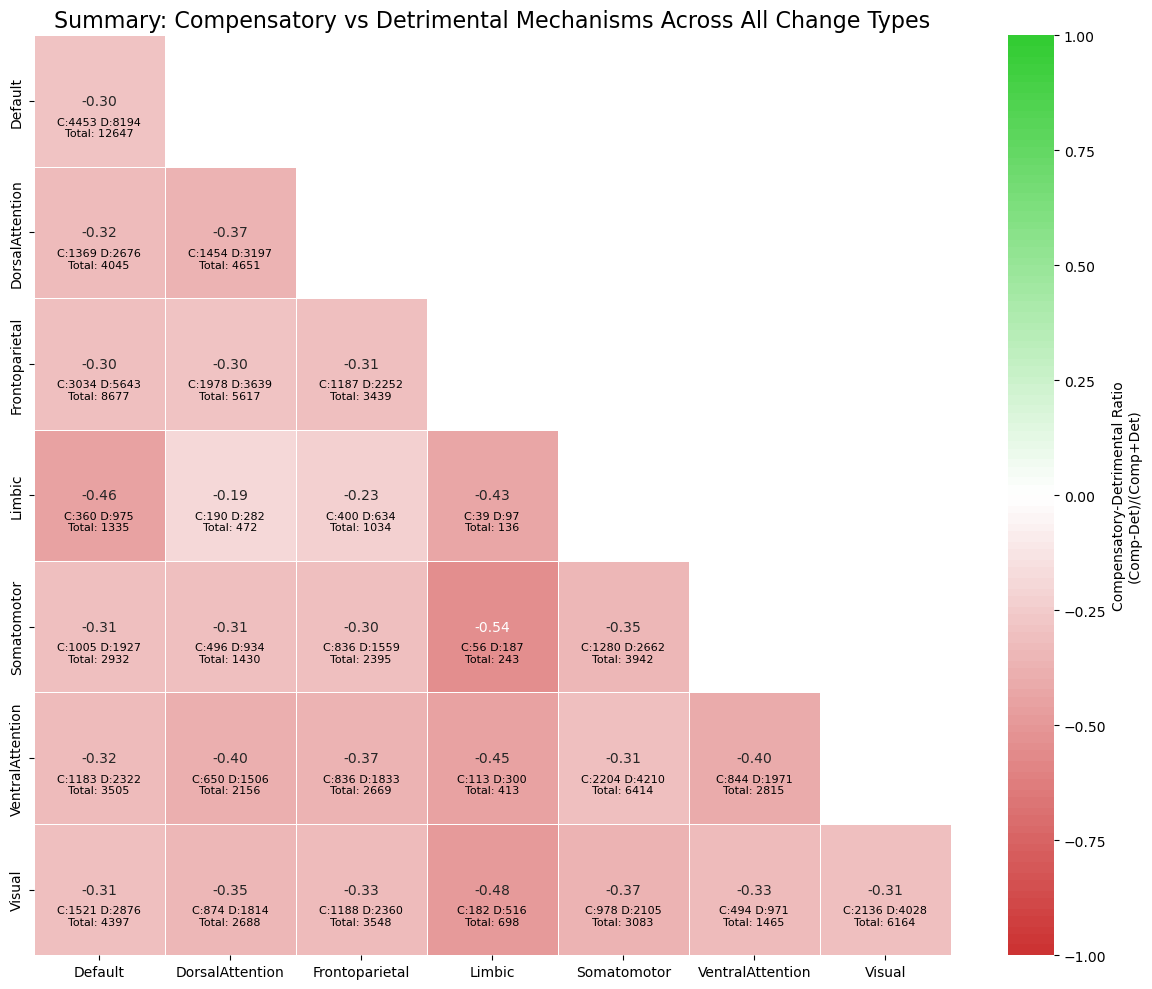

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

# Set the style
plt.style.use('default')

# Function to create heatmaps for each change type
def create_network_heatmaps(data_path, output_dir='network_heatmaps'):
    """
    Create a series of heatmaps showing compensatory vs detrimental mechanisms
    for each change type, broken down by network pairs.
    
    Parameters:
    -----------
    data_path : str
        Path to the network_pair_mechanism_summary.csv file
    output_dir : str
        Directory to save the output heatmaps
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the data
    data = pd.read_csv(data_path)
    
    # Define mechanism types
    compensatory_mechanisms = ['Restoration_Count', 'Alternative_Count', 'Normalization_Count', 'Enhancement_Count']
    detrimental_mechanisms = ['Deterioration_Count', 'Maladaptive_Count', 'Exacerbation_Count', 'Decompensation_Count']
    
    # Get unique networks and change types
    network_pairs = data['Network_Pair'].unique()
    networks = sorted(list(set([net for pair in network_pairs for net in pair.split('-')])))
    change_types = sorted(data['Change_Type'].unique())
    
    # Create a custom colormap that goes from red (detrimental) to white (neutral) to green (compensatory)
    colors = [(0.8, 0.2, 0.2), (1, 1, 1), (0.2, 0.8, 0.2)]  # Red -> White -> Green
    cmap = LinearSegmentedColormap.from_list('CompensatoryDetrimental', colors, N=100)
    
    # Process each change type
    for change_type in change_types:
        print(f"Processing {change_type}...")
        change_data = data[data['Change_Type'] == change_type].copy()
        
        # Initialize matrices for compensatory, detrimental, and ratio
        comp_matrix = pd.DataFrame(0, index=networks, columns=networks)
        det_matrix = pd.DataFrame(0, index=networks, columns=networks)
        ratio_matrix = pd.DataFrame(np.nan, index=networks, columns=networks)
        
        # Fill the matrices
        for _, row in change_data.iterrows():
            net1, net2 = row['Network_Pair'].split('-')
            
            # Sum compensatory and detrimental mechanisms
            comp_sum = sum(row[mech] for mech in compensatory_mechanisms)
            det_sum = sum(row[mech] for mech in detrimental_mechanisms)
            
            # Update matrices (ensure symmetric for better visualization)
            comp_matrix.loc[net1, net2] = comp_sum
            comp_matrix.loc[net2, net1] = comp_sum
            
            det_matrix.loc[net1, net2] = det_sum
            det_matrix.loc[net2, net1] = det_sum
            
            # Calculate ratio: (comp - det) / (comp + det) ranges from -1 to 1
            total = comp_sum + det_sum
            if total > 0:
                ratio = (comp_sum - det_sum) / total
                ratio_matrix.loc[net1, net2] = ratio
                ratio_matrix.loc[net2, net1] = ratio
        
        # Create the heatmap
        plt.figure(figsize=(12, 10))
        
        # Create mask for upper triangle to avoid redundancy
        mask = np.triu(np.ones_like(ratio_matrix, dtype=bool), k=1)
        
        # Plot the heatmap
        ax = sns.heatmap(ratio_matrix, 
                         cmap=cmap,
                         center=0,  # Center at 0 for clear distinction
                         vmin=-1,
                         vmax=1,
                         annot=True,  # Show the values
                         fmt=".2f",   # Format as 2 decimal places
                         linewidths=.5,
                         cbar_kws={'label': 'Compensatory-Detrimental Ratio\n(Comp-Det)/(Comp+Det)'},
                         mask=mask)  # Apply the mask
        
        # Add total count annotations
        for i, row_net in enumerate(networks):
            for j, col_net in enumerate(networks):
                if i >= j:  # Only annotate lower triangle and diagonal
                    comp = comp_matrix.loc[row_net, col_net]
                    det = det_matrix.loc[row_net, col_net]
                    total = comp + det
                    
                    if total > 0:  # Only annotate if there are mechanisms
                        # Add a second line with total counts
                        ax.text(j + 0.5, i + 0.7, 
                                f"C:{int(comp)} D:{int(det)}\nTotal: {int(total)}", 
                                ha='center', va='center', 
                                fontsize=8, color='black')
        
        plt.title(f'Compensatory vs Detrimental Mechanisms - {change_type}', fontsize=16)
        plt.tight_layout()
        
        # Save the figure
        output_path = os.path.join(output_dir, f'{change_type}_network_heatmap.png')
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"Saved heatmap to {output_path}")
    
    print(f"All heatmaps saved to {output_dir}")

# Also create a summary version with all change types in a single figure
def create_summary_heatmap(data_path, output_dir='network_heatmaps'):
    """
    Create a summary heatmap showing overall compensatory vs detrimental mechanisms 
    across all change types.
    """
    # Load the data
    data = pd.read_csv(data_path)
    
    # Define mechanism types
    compensatory_mechanisms = ['Restoration_Count', 'Alternative_Count', 'Normalization_Count', 'Enhancement_Count']
    detrimental_mechanisms = ['Deterioration_Count', 'Maladaptive_Count', 'Exacerbation_Count', 'Decompensation_Count']
    
    # Get unique networks
    network_pairs = data['Network_Pair'].unique()
    networks = sorted(list(set([net for pair in network_pairs for net in pair.split('-')])))
    
    # Create matrices for compensatory, detrimental, and ratio
    comp_matrix = pd.DataFrame(0, index=networks, columns=networks)
    det_matrix = pd.DataFrame(0, index=networks, columns=networks)
    ratio_matrix = pd.DataFrame(np.nan, index=networks, columns=networks)
    
    # Group data by network pair and calculate totals
    network_totals = data.groupby('Network_Pair').sum()
    
    # Fill the matrices
    for network_pair, row in network_totals.iterrows():
        net1, net2 = network_pair.split('-')
        
        # Sum compensatory and detrimental mechanisms
        comp_sum = sum(row[mech] for mech in compensatory_mechanisms)
        det_sum = sum(row[mech] for mech in detrimental_mechanisms)
        
        # Update matrices symmetrically
        comp_matrix.loc[net1, net2] = comp_sum
        comp_matrix.loc[net2, net1] = comp_sum
        
        det_matrix.loc[net1, net2] = det_sum
        det_matrix.loc[net2, net1] = det_sum
        
        # Calculate ratio
        total = comp_sum + det_sum
        if total > 0:
            ratio = (comp_sum - det_sum) / total
            ratio_matrix.loc[net1, net2] = ratio
            ratio_matrix.loc[net2, net1] = ratio
    
    # Create a custom colormap
    colors = [(0.8, 0.2, 0.2), (1, 1, 1), (0.2, 0.8, 0.2)]  # Red -> White -> Green
    cmap = LinearSegmentedColormap.from_list('CompensatoryDetrimental', colors, N=100)
    
    # Create the heatmap
    plt.figure(figsize=(12, 10))
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(ratio_matrix, dtype=bool), k=1)
    
    # Plot the heatmap
    ax = sns.heatmap(ratio_matrix, 
                     cmap=cmap,
                     center=0,
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     fmt=".2f",
                     linewidths=.5,
                     cbar_kws={'label': 'Compensatory-Detrimental Ratio\n(Comp-Det)/(Comp+Det)'},
                     mask=mask)
    
    # Add total count annotations
    for i, row_net in enumerate(networks):
        for j, col_net in enumerate(networks):
            if i >= j:  # Only annotate lower triangle and diagonal
                comp = comp_matrix.loc[row_net, col_net]
                det = det_matrix.loc[row_net, col_net]
                total = comp + det
                
                if total > 0:
                    ax.text(j + 0.5, i + 0.7, 
                            f"C:{int(comp)} D:{int(det)}\nTotal: {int(total)}", 
                            ha='center', va='center', 
                            fontsize=8, color='black')
    
    plt.title('Summary: Compensatory vs Detrimental Mechanisms Across All Change Types', fontsize=16)
    plt.tight_layout()
    
    # Save the figure
    output_path = os.path.join(output_dir, 'summary_network_heatmap.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Saved summary heatmap to {output_path}")
    
    return comp_matrix, det_matrix, ratio_matrix

# Function to create mechanism-specific heatmaps
def create_mechanism_heatmaps(data_path, output_dir='network_heatmaps'):
    """
    Create individual heatmaps for each specific mechanism type.
    """
    # Load the data
    data = pd.read_csv(data_path)
    
    # Define all mechanisms
    mechanisms = {
        'Compensatory': [
            'Restoration_Count', 
            'Alternative_Count', 
            'Normalization_Count', 
            'Enhancement_Count'
        ],
        'Detrimental': [
            'Deterioration_Count', 
            'Maladaptive_Count', 
            'Exacerbation_Count', 
            'Decompensation_Count'
        ]
    }
    
    # Create a flat list of all mechanisms
    all_mechanisms = mechanisms['Compensatory'] + mechanisms['Detrimental']
    
    # Get unique networks
    network_pairs = data['Network_Pair'].unique()
    networks = sorted(list(set([net for pair in network_pairs for net in pair.split('-')])))
    
    # Create a custom colormap for each category
    comp_cmap = plt.cm.Greens
    det_cmap = plt.cm.Reds
    
    # Group data by network pair and calculate totals
    network_totals = data.groupby('Network_Pair').sum()
    
    # Process each mechanism
    for mech in all_mechanisms:
        # Determine if compensatory or detrimental
        mech_type = 'Compensatory' if mech in mechanisms['Compensatory'] else 'Detrimental'
        cmap = comp_cmap if mech_type == 'Compensatory' else det_cmap
        
        # Initialize matrix
        mech_matrix = pd.DataFrame(0, index=networks, columns=networks)
        
        # Fill the matrix
        for network_pair, row in network_totals.iterrows():
            net1, net2 = network_pair.split('-')
            
            # Get mechanism count
            mech_count = row[mech]
            
            # Update matrix symmetrically
            mech_matrix.loc[net1, net2] = mech_count
            mech_matrix.loc[net2, net1] = mech_count
        
        # Create the heatmap
        plt.figure(figsize=(10, 8))
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(mech_matrix, dtype=bool), k=1)
        
        # Plot the heatmap
        sns.heatmap(mech_matrix, 
                    cmap=cmap,
                    annot=True,
                    fmt="d",  # Format as integer
                    linewidths=.5,
                    cbar_kws={'label': f'{mech.replace("_Count", "")} Count'},
                    mask=mask)
        
        plt.title(f'{mech.replace("_Count", "")} Mechanisms by Network Pair', fontsize=14)
        plt.tight_layout()
        
        # Save the figure
        mech_name = mech.replace("_Count", "").lower()
        output_path = os.path.join(output_dir, f'{mech_name}_network_heatmap.png')
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"Saved {mech_name} heatmap to {output_path}")

# Run the functions
if __name__ == "__main__":
    # Set the file path to your CSV file
    data_path = '/home/cerna3/neuroconn/Analyses/data_analysis_output/Network-specific-results/mechanism_analysis_results/network_pair_mechanism_summary.csv'
    
    # Set the output directory for the heatmaps
    output_dir = 'network_heatmaps_output'
    
    # Create heatmaps for each change type
    print("Generating change type specific heatmaps...")
    create_network_heatmaps(data_path, output_dir)
    
    # Create summary heatmap across all change types
    print("Generating summary heatmap...")
    comp_matrix, det_matrix, ratio_matrix = create_summary_heatmap(data_path, output_dir)
    
    # Create individual mechanism-specific heatmaps
    print("Generating mechanism-specific heatmaps...")
    create_mechanism_heatmaps(data_path, output_dir)
    
    print("All heatmaps have been generated successfully!")

Reading data from: /home/cerna3/neuroconn/Analyses/data_analysis_output/Network-specific-results/mechanism_analysis_results/network_pair_mechanism_summary.csv

Available change types:
1. DMNC
2. DMPC
3. IMNC
4. IMPC
5. SNPC
6. SPNC



Enter the number of the change type to analyze:  3



Analyzing change type: IMNC

Saved figure to: network_bar_graphs/IMNC_network_balance.png

Summary Statistics:

Within-Network Scores:
count    5.000000
mean     0.398443
std      0.062850
min      0.319149
25%      0.368771
50%      0.384615
75%      0.438596
max      0.481081
Name: Score, dtype: float64

Between-Network Scores:
count    30.000000
mean      0.451704
std       0.048128
min       0.380000
25%       0.414324
50%       0.441901
75%       0.480543
max       0.548387
Name: Score, dtype: float64
Saved within-network summary to: network_bar_graphs/IMNC_within_network_summary.csv
Saved between-network summary to: network_bar_graphs/IMNC_between_network_summary.csv


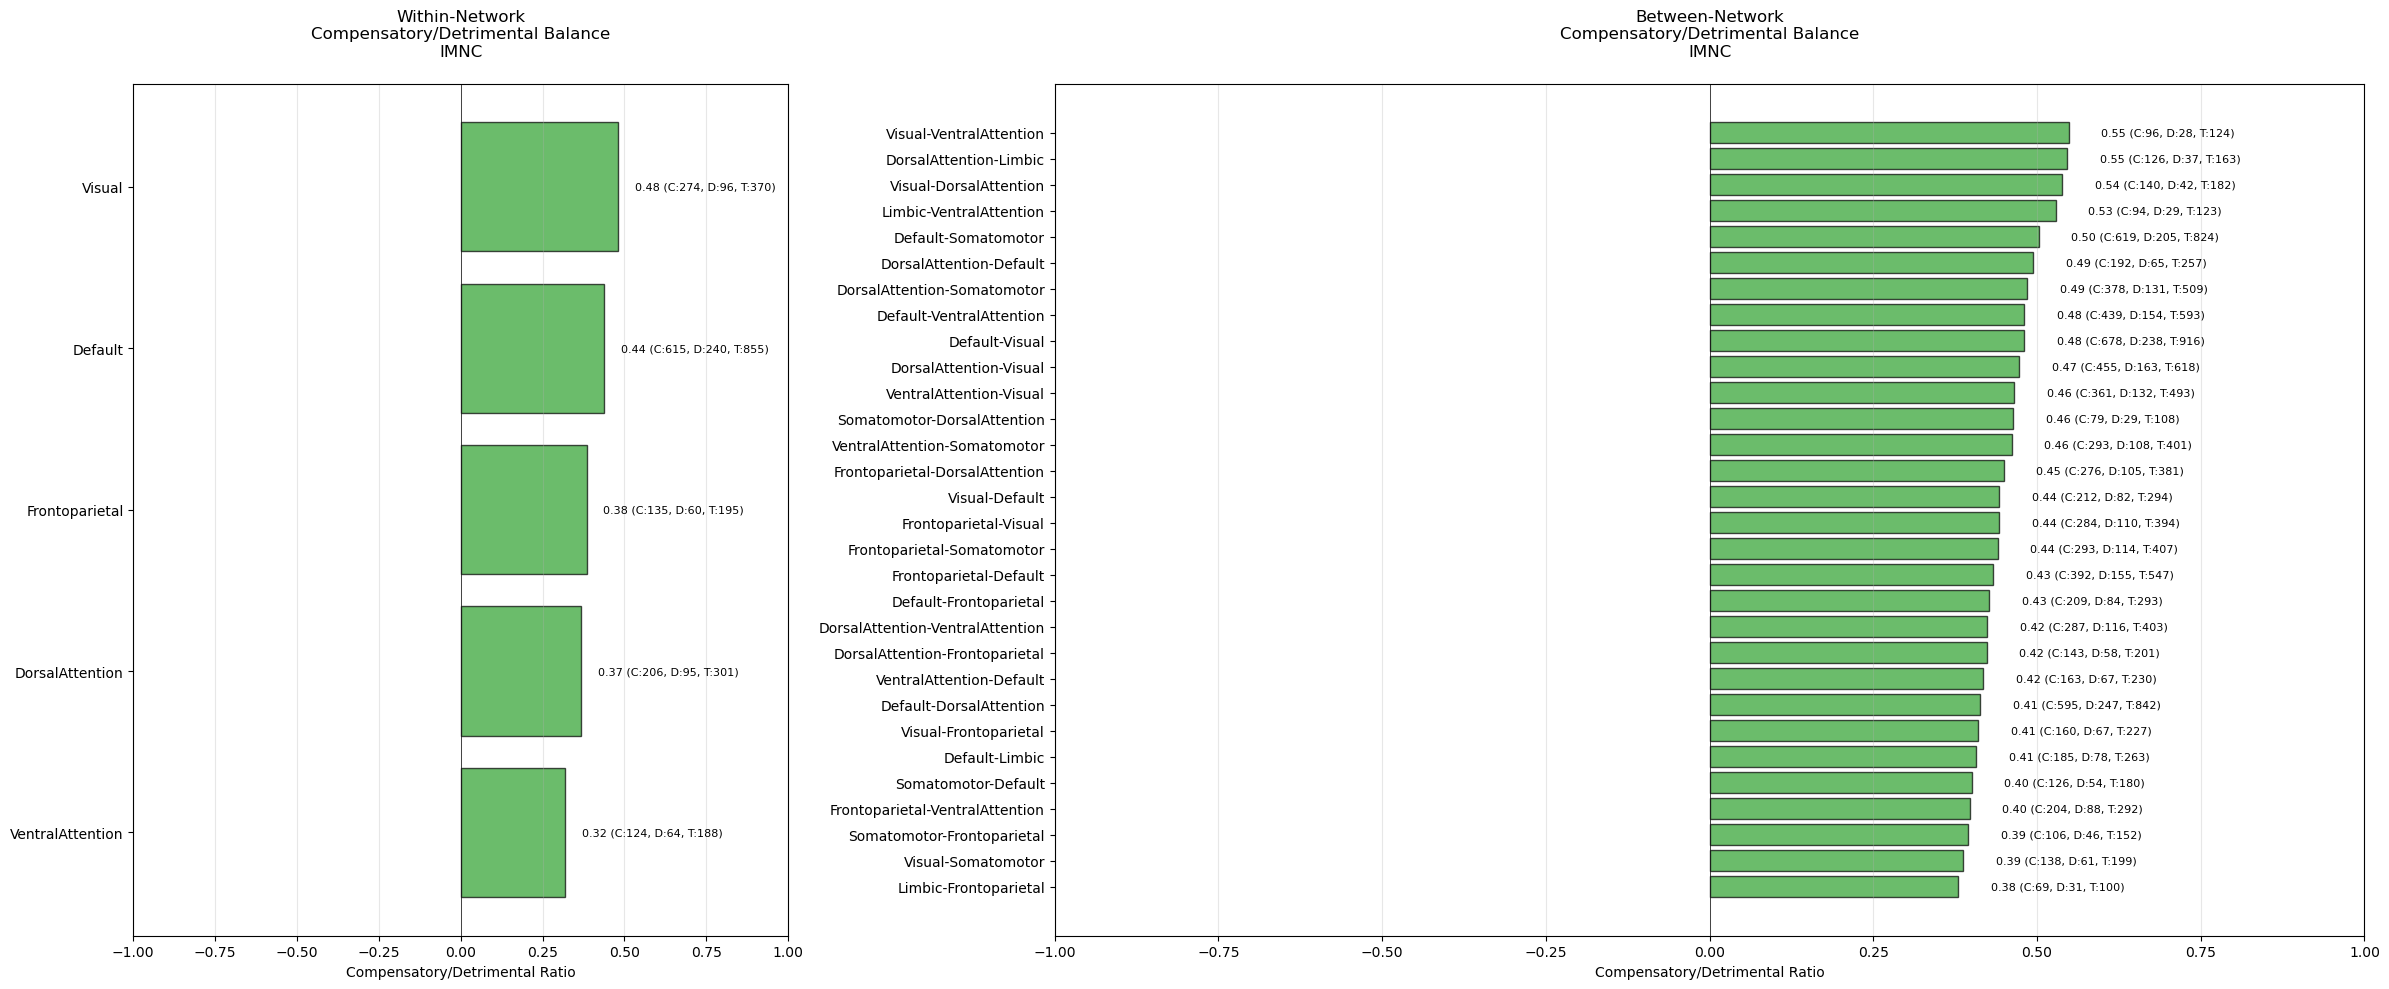

In [50]:
# Network-Specific Bar Graph Analysis with User Input for Change Type

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def generate_network_bar_graphs(data_path, change_type=None):
    """
    Generate horizontal bar graphs showing within-network and between-network
    compensatory/detrimental balance for a specific change type.
    
    Parameters:
    -----------
    data_path : str
        Path to the network_pair_mechanism_summary.csv file
    change_type : str
        The change type to analyze (e.g., 'IMPC', 'DMNC', 'SNPC', 'DMPC', 'IMNC', 'SPNC')
        If None, user will be prompted to select from available change types
    """
    # Load the data
    print(f"Reading data from: {data_path}")
    data = pd.read_csv(data_path)
    
    # Define mechanism categories
    compensatory_mechanisms = ['Restoration_Count', 'Alternative_Count', 'Normalization_Count', 'Enhancement_Count']
    detrimental_mechanisms = ['Deterioration_Count', 'Maladaptive_Count', 'Exacerbation_Count', 'Decompensation_Count']
    
    # Get unique networks and change types
    network_pairs = data['Network_Pair'].unique()
    networks = sorted(list(set([net for pair in network_pairs for net in pair.split('-')])))
    change_types = sorted(data['Change_Type'].unique())
    
    # Allow user to select a change type if not provided
    if change_type is None or change_type not in change_types:
        print("\nAvailable change types:")
        for i, ct in enumerate(change_types, 1):
            print(f"{i}. {ct}")
        
        try:
            selection = int(input("\nEnter the number of the change type to analyze: "))
            if 1 <= selection <= len(change_types):
                change_type = change_types[selection-1]
            else:
                print("Invalid selection. Using the first change type.")
                change_type = change_types[0]
        except ValueError:
            print("Invalid input. Using the first change type.")
            change_type = change_types[0]
    
    print(f"\nAnalyzing change type: {change_type}")
    
    # Filter data for the selected change type
    change_data = data[data['Change_Type'] == change_type].copy()
    
    # Calculate compensatory and detrimental sums for each network pair
    results = []
    for network_pair in network_pairs:
        pair_data = change_data[change_data['Network_Pair'] == network_pair]
        
        if not pair_data.empty:
            comp_sum = pair_data[compensatory_mechanisms].sum().sum()
            det_sum = pair_data[detrimental_mechanisms].sum().sum()
            total = comp_sum + det_sum
            
            # Calculate ratio: (comp - det) / (comp + det) ranges from -1 to 1
            if total > 0:
                ratio = (comp_sum - det_sum) / total
                
                results.append({
                    'Network_Pair': network_pair,
                    'Compensatory': comp_sum,
                    'Detrimental': det_sum,
                    'Total': total,
                    'Ratio': ratio
                })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    if results_df.empty:
        print(f"No data found for change type {change_type}")
        return
    
    # Separate within-network and between-network pairs
    within_network_data = []
    between_network_data = []
    
    for _, row in results_df.iterrows():
        network_pair = row['Network_Pair']
        net1, net2 = network_pair.split('-')
        
        if net1 == net2:  # Within-network
            within_network_data.append({
                'Connection': net1,
                'Score': row['Ratio'],
                'Compensatory': row['Compensatory'],
                'Detrimental': row['Detrimental'],
                'Total': row['Total']
            })
        else:  # Between-network
            between_network_data.append({
                'Connection': network_pair,
                'Score': row['Ratio'],
                'Compensatory': row['Compensatory'],
                'Detrimental': row['Detrimental'],
                'Total': row['Total']
            })
    
    # Convert to DataFrames
    df_within = pd.DataFrame(within_network_data)
    df_between = pd.DataFrame(between_network_data)
    
    # Check if we have data for both categories
    if df_within.empty and df_between.empty:
        print(f"No data to display for change type {change_type}")
        return
    
    # Sort both DataFrames by Score
    if not df_within.empty:
        df_within = df_within.sort_values('Score', ascending=True)
    
    if not df_between.empty:
        df_between = df_between.sort_values('Score', ascending=True)
    
    # Create figure and split it into two subplots with different widths
    # Use wider figure to accommodate long network pair names
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), 
                                  gridspec_kw={'width_ratios': [1, 2]},
                                  facecolor='white')
    
    # Within-Network subplot
    if not df_within.empty:
        bars1 = ax1.barh(
            range(len(df_within)), 
            df_within['Score'],
            color=['#d62728' if x < 0 else '#2ca02c' for x in df_within['Score']],  # Red for negative, green for positive
            edgecolor='black',
            alpha=0.7
        )
        ax1.set_yticks(range(len(df_within)))
        ax1.set_yticklabels(df_within['Connection'], fontsize=10)
        
        # Add value labels with count information
        for i, bar in enumerate(bars1):
            width = bar.get_width()
            label_x = width + 0.05 if width >= 0 else width - 0.05
            ha = 'left' if width >= 0 else 'right'
            
            # Get the counts for the label
            comp = df_within.iloc[i]['Compensatory']
            det = df_within.iloc[i]['Detrimental']
            total = df_within.iloc[i]['Total']
            
            ax1.text(label_x, i, 
                    f"{width:.2f} (C:{int(comp)}, D:{int(det)}, T:{int(total)})", 
                    va='center', ha=ha, fontsize=8)
    else:
        ax1.text(0.5, 0.5, "No within-network data available", ha='center', va='center', transform=ax1.transAxes)
    
    ax1.set_title(f'Within-Network\nCompensatory/Detrimental Balance\n{change_type}', pad=20)
    ax1.set_xlabel('Compensatory/Detrimental Ratio')
    ax1.grid(True, axis='x', alpha=0.3)
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax1.set_xlim(-1, 1)
    
    # Between-Network subplot
    if not df_between.empty:
        bars2 = ax2.barh(
            range(len(df_between)),
            df_between['Score'],
            color=['#d62728' if x < 0 else '#2ca02c' for x in df_between['Score']],  # Red for negative, green for positive
            edgecolor='black',
            alpha=0.7
        )
        ax2.set_yticks(range(len(df_between)))
        ax2.set_yticklabels(df_between['Connection'], fontsize=10)
        
        # Add value labels with count information
        for i, bar in enumerate(bars2):
            width = bar.get_width()
            label_x = width + 0.05 if width >= 0 else width - 0.05
            ha = 'left' if width >= 0 else 'right'
            
            # Get the counts for the label
            comp = df_between.iloc[i]['Compensatory']
            det = df_between.iloc[i]['Detrimental']
            total = df_between.iloc[i]['Total']
            
            ax2.text(label_x, i, 
                    f"{width:.2f} (C:{int(comp)}, D:{int(det)}, T:{int(total)})", 
                    va='center', ha=ha, fontsize=8)
    else:
        ax2.text(0.5, 0.5, "No between-network data available", ha='center', va='center', transform=ax2.transAxes)
    
    ax2.set_title(f'Between-Network\nCompensatory/Detrimental Balance\n{change_type}', pad=20)
    ax2.set_xlabel('Compensatory/Detrimental Ratio')
    ax2.grid(True, axis='x', alpha=0.3)
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax2.set_xlim(-1, 1)
    
    # Adjust layout
    plt.tight_layout()
    
    # Create output directory if it doesn't exist
    output_dir = 'network_bar_graphs'
    os.makedirs(output_dir, exist_ok=True)
    
    # Save figure
    output_path = os.path.join(output_dir, f'{change_type}_network_balance.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"\nSaved figure to: {output_path}")
    
    # Print summary statistics
    print("\nSummary Statistics:")
    
    if not df_within.empty:
        print("\nWithin-Network Scores:")
        print(df_within['Score'].describe())
    else:
        print("\nNo within-network data available.")
    
    if not df_between.empty:
        print("\nBetween-Network Scores:")
        print(df_between['Score'].describe())
    else:
        print("\nNo between-network data available.")
    
    # Save the summary data
    within_csv_path = os.path.join(output_dir, f'{change_type}_within_network_summary.csv')
    between_csv_path = os.path.join(output_dir, f'{change_type}_between_network_summary.csv')
    
    if not df_within.empty:
        df_within.to_csv(within_csv_path, index=False)
        print(f"Saved within-network summary to: {within_csv_path}")
    
    if not df_between.empty:
        df_between.to_csv(between_csv_path, index=False)
        print(f"Saved between-network summary to: {between_csv_path}")
    
    # Display the figure
    plt.show()
    
    return df_within, df_between

# Run the function if script is executed directly
if __name__ == "__main__":
    # Path to the data file
    data_path = '/home/cerna3/neuroconn/Analyses/data_analysis_output/Network-specific-results/mechanism_analysis_results/network_pair_mechanism_summary.csv'
    
    # You can specify a change type here, or leave it as None to be prompted
    # Example: generate_network_bar_graphs(data_path, 'IMPC')
    generate_network_bar_graphs(data_path)


Summary Statistics:

Within-Network Scores:
count    7.000000
mean    -0.352085
std      0.050634
min     -0.426471
25%     -0.387557
50%     -0.350583
75%     -0.308313
max     -0.295801
Name: Score, dtype: float64

Between-Network Scores:
count    21.000000
mean     -0.346765
std       0.081720
min      -0.539095
25%      -0.373548
50%      -0.324964
75%      -0.306294
max      -0.194915
Name: Score, dtype: float64

Within-Network Connections:
         Connection     Score
3            Limbic -0.426471
5  VentralAttention -0.400355
1   DorsalAttention -0.374758
4       Somatomotor -0.350583
2    Frontoparietal -0.309683
6            Visual -0.306944
0           Default -0.295801

Between-Network Connections:
                          Connection     Score
15                Limbic-Somatomotor -0.539095
17                     Limbic-Visual -0.478510
2                     Default-Limbic -0.460674
16           Limbic-VentralAttention -0.452785
9   DorsalAttention-VentralAttention -0.3970

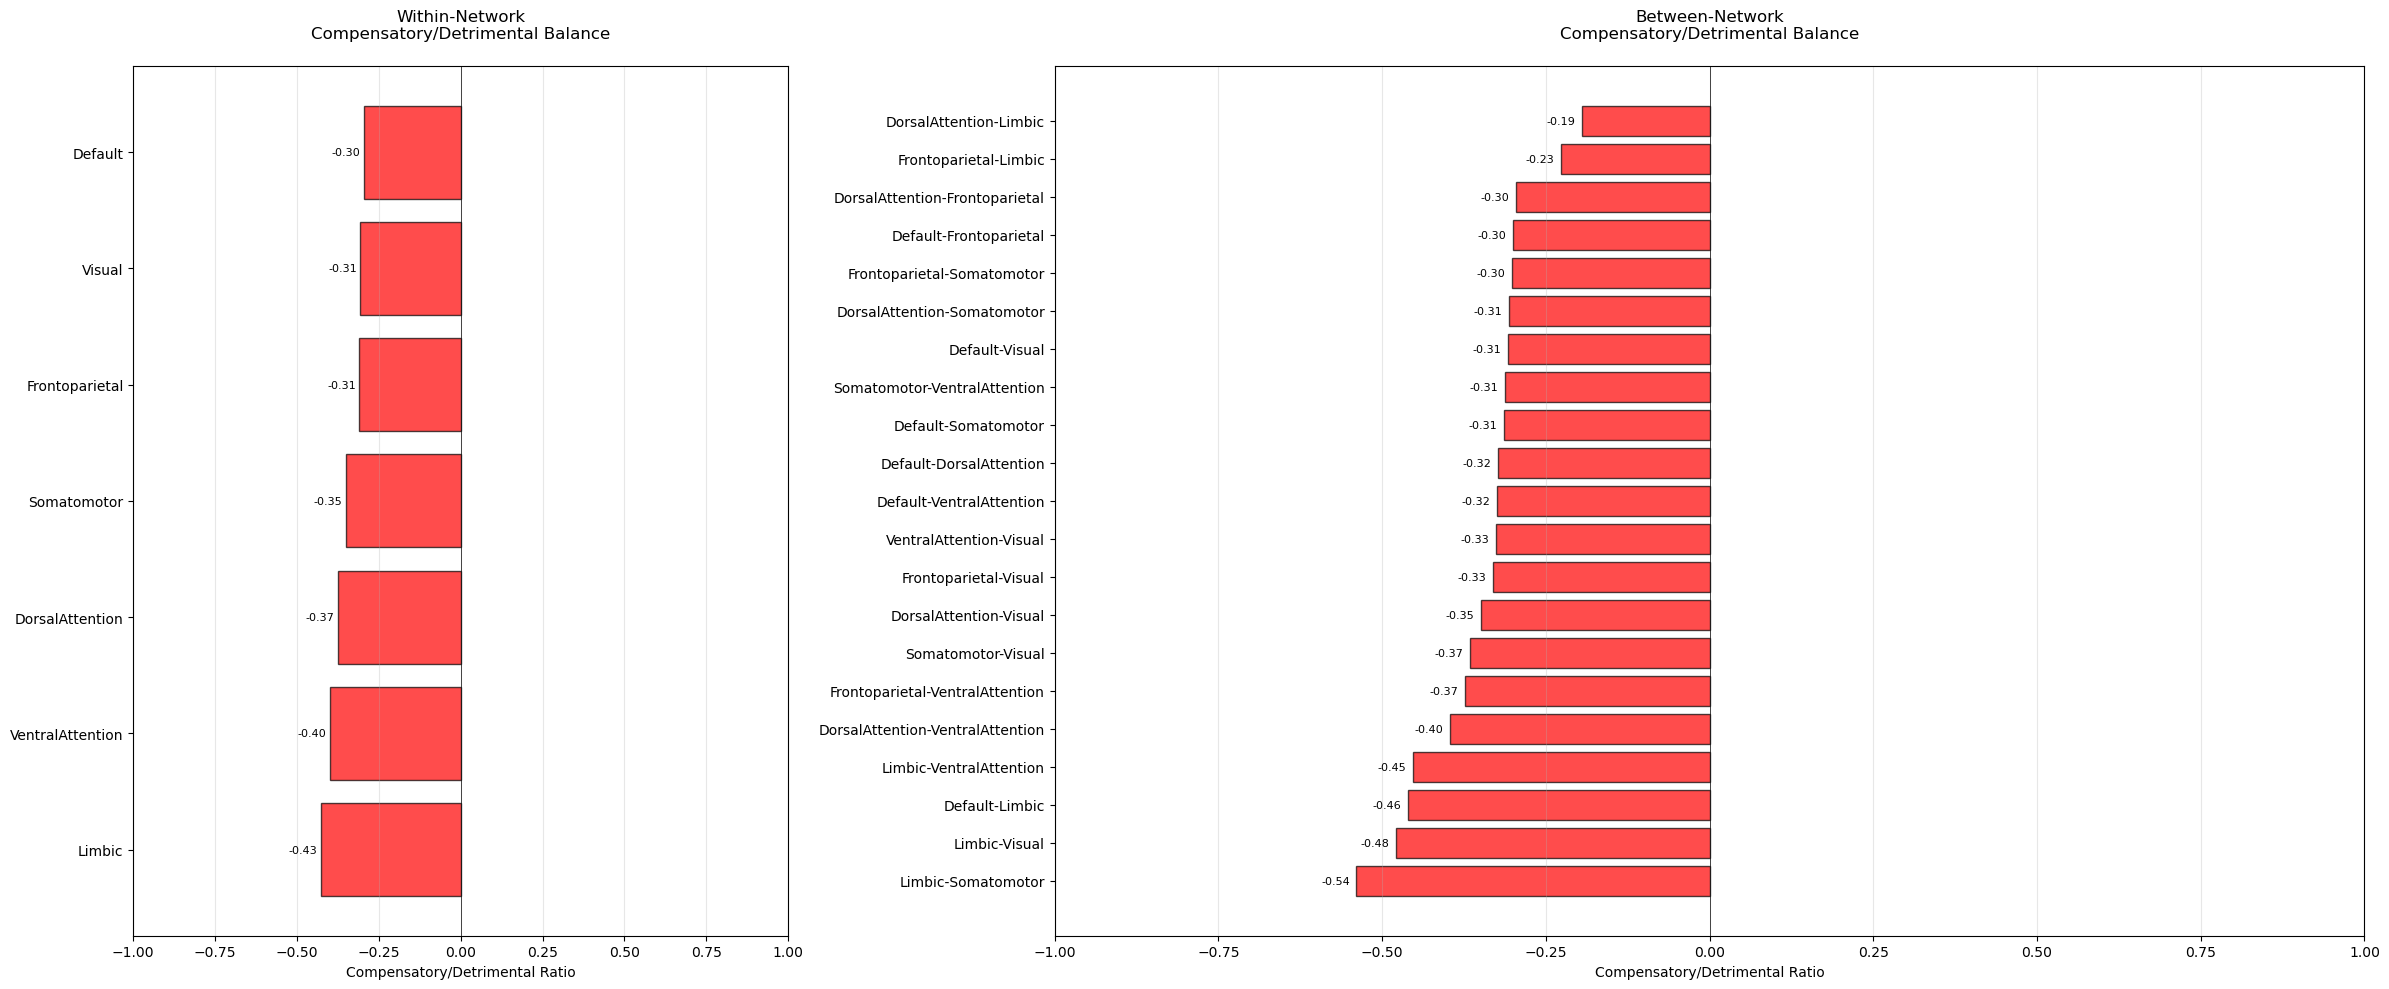

In [19]:
# Network-Specific Bar Graph Analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the network pair ratios data
df = pd.read_csv('/home/cerna3/neuroconn/Analyses/data_analysis_output/Network-specific-results/mechanism_analysis_results/network_pair_comp_det_ratios.csv')

# Set the index to be the unnamed first column which contains network names
df.set_index('Unnamed: 0', inplace=True)

# Prepare data for plotting
within_network_data = []
between_network_data = []

networks = df.index.tolist()

# Get within-network connections (diagonal)
for network in networks:
    score = df.loc[network, network]
    if not np.isnan(score):
        within_network_data.append({
            'Connection': network,
            'Score': score
        })

# Get between-network connections (off-diagonal)
for i, network1 in enumerate(networks):
    for j, network2 in enumerate(networks):
        if i < j:  # Only process each pair once
            score = df.loc[network1, network2]
            if not np.isnan(score):
                between_network_data.append({
                    'Connection': f'{network1}-{network2}',
                    'Score': score
                })

# Convert to DataFrames
df_within = pd.DataFrame(within_network_data)
df_between = pd.DataFrame(between_network_data)

# Sort both DataFrames by Score
df_within = df_within.sort_values('Score', ascending=True)
df_between = df_between.sort_values('Score', ascending=True)

# Create figure and split it into two subplots with different widths
# Use wider figure to accommodate long network pair names
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), 
                              gridspec_kw={'width_ratios': [1, 2]},
                              facecolor='white')

# Within-Network subplot
bars1 = ax1.barh(
    range(len(df_within)), 
    df_within['Score'],
    color=['red' if x < 0 else 'green' for x in df_within['Score']],
    edgecolor='black',
    alpha=0.7
)
ax1.set_yticks(range(len(df_within)))
ax1.set_yticklabels(df_within['Connection'], fontsize=10)
ax1.set_title('Within-Network\nCompensatory/Detrimental Balance', pad=20)
ax1.set_xlabel('Compensatory/Detrimental Ratio')
ax1.grid(True, axis='x', alpha=0.3)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_xlim(-1, 1)

# Between-Network subplot
bars2 = ax2.barh(
    range(len(df_between)),
    df_between['Score'],
    color=['red' if x < 0 else 'green' for x in df_between['Score']],
    edgecolor='black',
    alpha=0.7
)
ax2.set_yticks(range(len(df_between)))
ax2.set_yticklabels(df_between['Connection'], fontsize=10)
ax2.set_title('Between-Network\nCompensatory/Detrimental Balance', pad=20)
ax2.set_xlabel('Compensatory/Detrimental Ratio')
ax2.grid(True, axis='x', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_xlim(-1, 1)

# Add value labels on the bars
for ax, bars in [(ax1, bars1), (ax2, bars2)]:
    for i, bar in enumerate(bars):
        width = bar.get_width()
        label_x = width + 0.01 if width >= 0 else width - 0.01
        ha = 'left' if width >= 0 else 'right'
        ax.text(label_x, i, f'{width:.2f}', 
                va='center', ha=ha, fontsize=8)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('network_benefit_ratio_summary.png', 
            dpi=300, 
            bbox_inches='tight')

# Print summary statistics
print("\nSummary Statistics:")
print("\nWithin-Network Scores:")
print(df_within['Score'].describe())
print("\nBetween-Network Scores:")
print(df_between['Score'].describe())

# Save the summary data
df_within.to_csv('within_network_summary.csv', index=False)
df_between.to_csv('between_network_summary.csv', index=False)

# Display raw data for verification
print("\nWithin-Network Connections:")
print(df_within)
print("\nBetween-Network Connections:")
print(df_between)

/tmp/ipykernel_940165/568042130.py:209: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


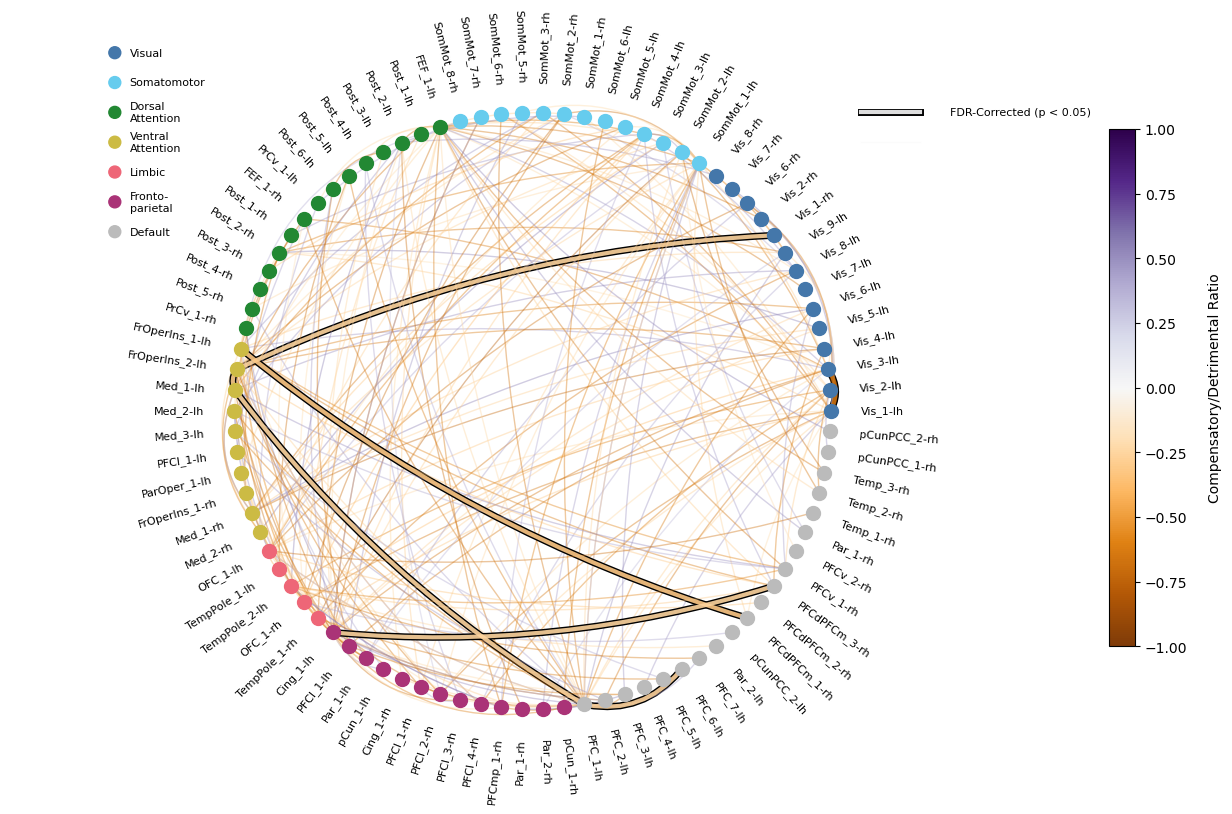

In [9]:
# Compensatory/Detrimental Connectivity Plot 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch, Circle
from matplotlib.lines import Line2D
from collections import defaultdict

# Load the data
df = pd.read_csv('network_specific_wilcoxon_results_FDR_corrected.csv')

# FDR correction threshold
FDR_THRESHOLD = 0.05

# Function to shorten region names
def shorten_region_name(name):
    """Remove network prefix while handling special cases for Visual and Somatomotor."""
    parts = name.split('_')
    if 'Vis' in name:
        return '_'.join(parts[2:])  # Visual regions have different structure
    elif 'SomMot' in name:
        return '_'.join(parts[2:])  # Somatomotor regions have different structure
    else:
        return '_'.join(parts[3:])  # Other networks follow standard structure

# Create a mapping of networks to colors and their display names
network_colors = {
    'Visual': ('#4477AA', 'Visual'),
    'Somatomotor': ('#66CCEE', 'Somatomotor'),
    'DorsalAttention': ('#228833', 'Dorsal\nAttention'),
    'VentralAttention': ('#CCBB44', 'Ventral\nAttention'),
    'Limbic': ('#EE6677', 'Limbic'),
    'Frontoparietal': ('#AA3377', 'Fronto-\nparietal'),
    'Default': ('#BBBBBB', 'Default')
}

# Process region names and create node list
unique_regions = pd.concat([df['Region1'], df['Region2']]).unique()
shortened_regions = {region: shorten_region_name(region) for region in unique_regions}

# Create a mapping of regions to their networks
region_to_network = {}
for _, row in df.iterrows():
    region1, region2 = row['Region1'], row['Region2']
    network1, network2 = row['Network_Pair'].split('-')
    region_to_network[region1] = network1
    region_to_network[region2] = network2

# Group regions by network
network_regions = defaultdict(list)
for region in unique_regions:
    network = region_to_network[region]
    network_regions[network].append(region)

# Create an ordered list of regions, grouped by network
ordered_regions = []
for network in network_colors.keys():
    ordered_regions.extend(sorted(network_regions[network]))

# Create a MultiGraph to allow duplicate (parallel) edges
G = nx.MultiGraph()

# Add nodes (regions) in the correct order
for region in ordered_regions:
    network = region_to_network[region]
    G.add_node(region, network=network, color=network_colors[network][0])

# Add edges from the data and save the CSV row index with each edge
for i, row in df.iterrows():
    G.add_edge(row['Region1'], row['Region2'], index=i)

# Calculate node positions in a circle while maintaining network grouping
n_nodes = len(ordered_regions)
angles = np.linspace(0, 2*np.pi, n_nodes, endpoint=False)
pos = {node: (np.cos(angle), np.sin(angle)) 
       for node, angle in zip(ordered_regions, angles)}

plt.figure(figsize=(15, 10), facecolor='white')
ax = plt.axes([0.1, 0.1, 0.75, 0.75])
ax.set_facecolor('white')

# Draw nodes
for node, (x, y) in pos.items():
    network = region_to_network[node]
    color = network_colors[network][0]
    plt.scatter(x, y, c=color, s=100, zorder=3)
    
    # Add node labels
    angle = np.arctan2(y, x)
    if -np.pi/2 <= angle <= np.pi/2:
        ha = 'left'
        x_text = x * 1.1
        rotation = angle * 180/np.pi
    else:
        ha = 'right'
        x_text = x * 1.1
        rotation = angle * 180/np.pi + 180
    
    plt.text(x_text, y * 1.1, shortened_regions[node], 
             color='black', ha=ha, va='center', 
             rotation=rotation, rotation_mode='anchor',
             fontsize=8)

# Draw edges with modified ratio calculation and black edges for FDR-corrected connections
cmap = plt.cm.PuOr.copy()  # Using a colorblind-friendly diverging colormap

fdr_significant_count = 0

# Iterate over all edges including parallel ones
for u, v, key, data in G.edges(keys=True, data=True):
    edge_data = df.loc[data['index']]
    start = pos[u]
    end = pos[v]
    
    # Calculate compensatory and detrimental totals and the ratio as before...
    compensatory = edge_data['Restoration_Count'] + edge_data['Alternative_Count']
    detrimental = edge_data['Deterioration_Count'] + edge_data['Maladaptive_Count']
    total = compensatory + detrimental
    ratio = (compensatory - detrimental) / total if total > 0 else 0
    edge_color = cmap((ratio + 1) / 2)
    
    # Choose a connection style based on whether it's a within-network connection:
    if region_to_network[u] == region_to_network[v]:
        # For within-network connections, use a larger rad value for a more pronounced arc.
        conn_style = "arc3,rad=0.3"
    else:
        # For between-network connections, use the default curvature.
        conn_style = "arc3,rad=0.1"
    
    # Check FDR significance and draw accordingly:
    is_significant = edge_data['P_Value_Corrected'] < FDR_THRESHOLD
    if is_significant:
        fdr_significant_count += 1
        black_edge = FancyArrowPatch(
            start, end,
            connectionstyle=conn_style,
            color='black',
            alpha=1.0,
            linewidth=5,
            arrowstyle='-',
            zorder=1
        )
        ax.add_patch(black_edge)
        
        colored_edge = FancyArrowPatch(
            start, end,
            connectionstyle=conn_style,
            color=edge_color,
            alpha=0.9,
            linewidth=3,
            arrowstyle='-',
            zorder=2
        )
        ax.add_patch(colored_edge)
    else:
        edge_patch = FancyArrowPatch(
            start, end,
            connectionstyle=conn_style,
            color=edge_color,
            alpha=0.4,
            linewidth=1,
            arrowstyle='-',
            zorder=1
        )
        ax.add_patch(edge_patch)


# Add network legend
legend_x = -1.4
legend_y = 1.2
for i, (network, (color, display_name)) in enumerate(network_colors.items()):
    circle = Circle((legend_x, legend_y - i*0.1), 0.02, color=color)
    ax.add_patch(circle)
    plt.text(legend_x + 0.05, legend_y - i*0.1, display_name, 
             color='black', va='center', ha='left', fontsize=8)

# Add custom legend for FDR significance
legend_x2 = 1.2
legend_y2 = 1.0
plt.text(legend_x2 + 0.2, legend_y2, f'FDR-Corrected (p < {FDR_THRESHOLD})', 
         color='black', va='center', ha='left', fontsize=8)
#plt.text(legend_x2 + 0.2, legend_y2 - 0.1, 'Non-Significant', 
#         color='black', va='center', ha='left', fontsize=8)

# Draw the legend lines
black_line = Line2D([legend_x2-0.1, legend_x2+0.1], [legend_y2, legend_y2], 
                    color='black', lw=5, alpha=1.0)
ax.add_line(black_line)
colored_line = Line2D([legend_x2-0.1, legend_x2+0.1], [legend_y2, legend_y2], 
                    color=cmap(0.5), lw=3, alpha=0.9)
ax.add_line(colored_line)
non_sig = Line2D([legend_x2-0.1, legend_x2+0.1], [legend_y2-0.1, legend_y2-0.1], 
                 color=cmap(0.5), lw=1, alpha=0.4)
ax.add_line(non_sig)

# Add colorbar with modified range
norm = plt.Normalize(-1, 1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.023, pad=0.08)
cbar.ax.set_ylabel('Compensatory/Detrimental Ratio', color='black', labelpad=15)
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

plt.axis('equal')
plt.axis('off')

plt.tight_layout()
plt.savefig('region_connectivity_plot_black_edges.png', 
            facecolor='white', edgecolor='none', 
            bbox_inches='tight', dpi=300)
plt.show()

In [1]:
# Combined Correlations Between Connectivity and Behavior (Cognitive, Motor Function, Emotional Regulation)

import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

# ========================
# Global Variables & Paths
# ========================
NETWORK_SPECIFIC_RESULTS = "/home/cerna3/neuroconn/Analyses/data_analysis_output/Network-specific-results/network_specific_wilcoxon_results_FDR_corrected.csv"
BEHAVIORAL_SCORES_PATH = "/home/cerna3/neuroconn/Datasets_and_raw_data/RBANS_miniBEST_GDS.xlsx"
TMT_SCORES_PATH = "/home/cerna3/neuroconn/Datasets_and_raw_data/TMT.xlsx"
BASE_DIR = "/home/cerna3/neuroconn/data/out/subjects/"
OUTPUT_DIR = "connectivity_behavioral_correlations"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Participant groups
PARTICIPANT_GROUPS = {
    'YAC': ['101', '102', '103', '104', '105', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120'],
    'OAC': ['202', '205', '206', '207', '208', '209', '210', '211', '214', '215', '216', '217', '218', '219', '221'],
    'TCOA': ['401', '402', '403', '404', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416']
}

# ========================
# Helper Functions
# ========================

def get_region_index(region_name, labels):
    """Return the index of region_name in labels or None if not found."""
    try:
        return list(labels).index(region_name)
    except ValueError:
        return None

def load_behavioral_data():
    """Load and prepare all behavioral data from Excel files (miniBEST, GDS, and TMT)."""
    print("Loading behavioral data...")
    try:
        # Load original behavioral data
        behavioral_df = pd.read_excel(BEHAVIORAL_SCORES_PATH)
        behavioral_df["ID"] = behavioral_df["ID"].astype(str)
        
        # Ensure expected columns exist for original behavioral data
        expected_columns = ["final_score_miniBEST", "final_score_GDS"]
        if not all(col in behavioral_df.columns for col in expected_columns):
            # If columns are not named correctly, rename based on position
            if len(behavioral_df.columns) >= 4:
                cols = list(behavioral_df.columns)
                behavioral_df.rename(columns={ 
                    cols[2]: "final_score_miniBEST", 
                    cols[3]: "final_score_GDS"
                }, inplace=True)
            else:
                raise ValueError("Behavioral data file does not have enough columns")
                
        # Add a group identifier column
        behavioral_df["Group"] = "Unknown"
        for group, ids in PARTICIPANT_GROUPS.items():
            behavioral_df.loc[behavioral_df["ID"].isin(ids), "Group"] = group
        
        # Load TMT data
        tmt_df = pd.read_excel(TMT_SCORES_PATH)
        tmt_df["ID"] = tmt_df["ID"].astype(str)
        
        # Convert TMT time columns to numeric, coercing non-numeric values to NaN
        tmt_df["A_Time(s)"] = pd.to_numeric(tmt_df["A_Time(s)"], errors='coerce')
        tmt_df["B_Time(s)"] = pd.to_numeric(tmt_df["B_Time(s)"], errors='coerce')
        
        # Merge the TMT data with the behavioral data
        merged_df = pd.merge(behavioral_df, tmt_df[["ID", "A_Time(s)", "B_Time(s)"]], on="ID", how="left")
        
        # Perform mean imputation for TCOA group if there are missing values
        tcoa_mask = merged_df["Group"] == "TCOA"
        for col in ["A_Time(s)", "B_Time(s)"]:
            # Make sure the column is numeric type
            merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
            
            # Calculate mean of non-missing values in TCOA group
            tcoa_values = merged_df.loc[tcoa_mask, col].dropna()
            if len(tcoa_values) > 0:
                col_mean = tcoa_values.mean()
                # Impute missing values in TCOA group with the mean
                missing_mask = merged_df[col].isna() & tcoa_mask
                merged_df.loc[missing_mask, col] = col_mean
                print(f"Imputed {missing_mask.sum()} missing values in {col} for TCOA group")
            else:
                print(f"Warning: No valid values found in {col} for TCOA group. Cannot impute.")
        
        print(f"Loaded behavioral data for {len(merged_df)} participants")
        return merged_df
    except Exception as e:
        print(f"Error loading behavioral data: {str(e)}")
        raise

def load_labels():
    """
    Load region labels from a sample participant's npz file.
    If not available, returns dummy labels.
    """
    print("Loading region labels...")
    sample_participant = PARTICIPANT_GROUPS['YAC'][0]
    sample_mode = 'EC'
    npz_path = Path(BASE_DIR) / sample_participant / sample_mode / f"{sample_participant}_correlation_matrices.npy.npz"
    
    try:
        if npz_path.exists():
            data = np.load(npz_path, allow_pickle=True)
            # Get a sample matrix and its dimension
            sample_matrix = data[list(data.files)[0]][:-2, :-2]  # Remove last 2 dimensions
            n_regions = sample_matrix.shape[0]
            
            # Predefined labels list (adjust if you have a custom label set)
            labels = [
                '7Networks_LH_Cont_Cing_1-lh',
                '7Networks_LH_Cont_Par_1-lh',
                '7Networks_LH_Cont_PFCl_1-lh',
                '7Networks_LH_Cont_pCun_1-lh',
                '7Networks_LH_Default_Par_1-lh',
                '7Networks_LH_Default_Par_2-lh',
                '7Networks_LH_Default_pCunPCC_1-lh',
                '7Networks_LH_Default_pCunPCC_2-lh',
                '7Networks_LH_Default_PFC_1-lh',
                '7Networks_LH_Default_PFC_2-lh',
                '7Networks_LH_Default_PFC_3-lh',
                '7Networks_LH_Default_PFC_4-lh',
                '7Networks_LH_Default_PFC_5-lh',
                '7Networks_LH_Default_PFC_6-lh',
                '7Networks_LH_Default_PFC_7-lh',
                '7Networks_LH_Default_Temp_1-lh',
                '7Networks_LH_Default_Temp_2-lh',
                '7Networks_LH_DorsAttn_FEF_1-lh',
                '7Networks_LH_DorsAttn_Post_1-lh',
                '7Networks_LH_DorsAttn_Post_2-lh',
                '7Networks_LH_DorsAttn_Post_3-lh',
                '7Networks_LH_DorsAttn_Post_4-lh',
                '7Networks_LH_DorsAttn_Post_5-lh',
                '7Networks_LH_DorsAttn_Post_6-lh',
                '7Networks_LH_DorsAttn_PrCv_1-lh',
                '7Networks_LH_Limbic_OFC_1-lh',
                '7Networks_LH_Limbic_TempPole_1-lh',
                '7Networks_LH_Limbic_TempPole_2-lh',
                '7Networks_LH_SalVentAttn_FrOperIns_1-lh',
                '7Networks_LH_SalVentAttn_FrOperIns_2-lh',
                '7Networks_LH_SalVentAttn_Med_1-lh',
                '7Networks_LH_SalVentAttn_Med_2-lh',
                '7Networks_LH_SalVentAttn_Med_3-lh',
                '7Networks_LH_SalVentAttn_ParOper_1-lh',
                '7Networks_LH_SalVentAttn_PFCl_1-lh',
                '7Networks_LH_SomMot_1-lh',
                '7Networks_LH_SomMot_2-lh',
                '7Networks_LH_SomMot_3-lh',
                '7Networks_LH_SomMot_4-lh',
                '7Networks_LH_SomMot_5-lh',
                '7Networks_LH_SomMot_6-lh',
                '7Networks_LH_Vis_1-lh',
                '7Networks_LH_Vis_2-lh',
                '7Networks_LH_Vis_3-lh',
                '7Networks_LH_Vis_4-lh',
                '7Networks_LH_Vis_5-lh',
                '7Networks_LH_Vis_6-lh',
                '7Networks_LH_Vis_7-lh',
                '7Networks_LH_Vis_8-lh',
                '7Networks_LH_Vis_9-lh',
                '7Networks_RH_Cont_Cing_1-rh',
                '7Networks_RH_Cont_Par_1-rh',
                '7Networks_RH_Cont_Par_2-rh',
                '7Networks_RH_Cont_PFCl_1-rh',
                '7Networks_RH_Cont_PFCl_2-rh',
                '7Networks_RH_Cont_PFCl_3-rh',
                '7Networks_RH_Cont_PFCl_4-rh',
                '7Networks_RH_Cont_PFCmp_1-rh',
                '7Networks_RH_Cont_pCun_1-rh',
                '7Networks_RH_Default_Par_1-rh',
                '7Networks_RH_Default_pCunPCC_1-rh',
                '7Networks_RH_Default_pCunPCC_2-rh',
                '7Networks_RH_Default_PFCdPFCm_1-rh',
                '7Networks_RH_Default_PFCdPFCm_2-rh',
                '7Networks_RH_Default_PFCdPFCm_3-rh',
                '7Networks_RH_Default_PFCv_1-rh',
                '7Networks_RH_Default_PFCv_2-rh',
                '7Networks_RH_Default_Temp_1-rh',
                '7Networks_RH_Default_Temp_2-rh',
                '7Networks_RH_Default_Temp_3-rh',
                '7Networks_RH_DorsAttn_FEF_1-rh',
                '7Networks_RH_DorsAttn_Post_1-rh',
                '7Networks_RH_DorsAttn_Post_2-rh',
                '7Networks_RH_DorsAttn_Post_3-rh',
                '7Networks_RH_DorsAttn_Post_4-rh',
                '7Networks_RH_DorsAttn_Post_5-rh',
                '7Networks_RH_DorsAttn_PrCv_1-rh',
                '7Networks_RH_Limbic_OFC_1-rh',
                '7Networks_RH_Limbic_TempPole_1-rh',
                '7Networks_RH_SalVentAttn_FrOperIns_1-rh',
                '7Networks_RH_SalVentAttn_Med_1-rh',
                '7Networks_RH_SalVentAttn_Med_2-rh',
                '7Networks_RH_SalVentAttn_TempOccPar_1-rh',
                '7Networks_RH_SalVentAttn_TempOccPar_2-rh',
                '7Networks_RH_SomMot_1-rh',
                '7Networks_RH_SomMot_2-rh',
                '7Networks_RH_SomMot_3-rh',
                '7Networks_RH_SomMot_4-rh',
                '7Networks_RH_SomMot_5-rh',
                '7Networks_RH_SomMot_6-rh',
                '7Networks_RH_SomMot_7-rh',
                '7Networks_RH_SomMot_8-rh',
                '7Networks_RH_Vis_1-rh',
                '7Networks_RH_Vis_2-rh',
                '7Networks_RH_Vis_3-rh',
                '7Networks_RH_Vis_4-rh',
                '7Networks_RH_Vis_5-rh',
                '7Networks_RH_Vis_6-rh',
                '7Networks_RH_Vis_7-rh',
                '7Networks_RH_Vis_8-rh'
            ]
            
            if len(labels) != n_regions:
                print(f"Warning: Label count ({len(labels)}) does not match matrix dimension ({n_regions}). Adjusting labels.")
                if len(labels) > n_regions:
                    labels = labels[:n_regions]
                else:
                    labels = labels + [f"Region_{i}" for i in range(n_regions - len(labels))]
            
            print(f"Loaded {len(labels)} region labels")
            return labels
        else:
            print(f"Sample npz file not found at {npz_path}. Using dummy labels.")
            return [f"Region_{i}" for i in range(100)]
    except Exception as e:
        print(f"Error loading labels: {str(e)}. Using dummy labels.")
        return [f"Region_{i}" for i in range(100)]

# ========================
# Updated Plotting Function
# ========================

def plot_significant_correlation(merged_df, region1, region2, network_pair, behav_measure, rho, p_val, output_filepath):
    """
    Create and save a scatter plot with a regression line.
    Axis labels and title are set dynamically based on the behavioral measure 
    and network pair information.
    """
    # Define mapping dictionaries for behavioral measures and network abbreviations.
    behavioral_label_map = {
        "final_score_miniBEST": ("Mini-BESTest Score", "Motor Function"),
        "final_score_GDS": ("GDS Score", "Depression"),
        "A_Time(s)": ("TMT Trial A Time (s)", "Processing Speed"),
        "B_Time(s)": ("TMT Trial B Time (s)", "Executive Function")
    }
    
    network_abbrev = {
        "Default": "DMN",
        "Frontoparietal": "FPN",
        "Visual": "VIN",
        "VentralAttention": "VAN",
        "DorsalAttention": "DAN",
        "Limbic": "LIN",
        "Somatomotor": "SMN"
    }
    
    # Determine the connectivity type and network label from network_pair.
    if '-' in network_pair:
        nets = [net.strip() for net in network_pair.split('-')]
        if len(nets) == 2:
            if nets[0].lower() == nets[1].lower():
                conn_type = "Within-network"
                network_label = network_abbrev.get(nets[0].title(), nets[0])
            else:
                conn_type = "Between-network"
                network_label = f"{network_abbrev.get(nets[0].title(), nets[0])}-{network_abbrev.get(nets[1].title(), nets[1])}"
        else:
            conn_type = "Network"
            network_label = network_pair
    else:
        conn_type = "Within-network"
        network_label = network_abbrev.get(network_pair.strip().title(), network_pair.strip())
    
    # For connectivity, always use "Higher"
    connectivity_descriptor = "Higher"
    
    # For TMT measures, lower scores are better (faster completion times)
    # For GDS, lower scores are better (less depression)
    # So we need to reverse the interpretation of rho for these measures
    if behav_measure in ["A_Time(s)", "B_Time(s)", "final_score_GDS"]:
        behav_descriptor = "Lower" if rho >= 0 else "Greater"
    else:
        # For other behavioral measures, use "Greater" if rho is positive, otherwise "Lower"
        behav_descriptor = "Greater" if rho >= 0 else "Lower"
    
    # Get the behavioral y-axis label and function from the mapping.
    behav_y_label, behav_function = behavioral_label_map.get(behav_measure, ("Score", "Function"))
    
    # Set dynamic axis labels and title
    x_label = f"{network_label} Connectivity (Z-scored)"
    y_label = behav_y_label
    title = f"{connectivity_descriptor} {conn_type} {network_label} Connectivity Correlates with {behav_descriptor} {behav_function}"
    
    # Ensure connectivity values are Z-scored.
    connectivity_zscore = stats.zscore(merged_df['Connectivity'])
    
    plt.figure(figsize=(10, 7))
    
    # Create scatter plot with Z-scored connectivity.
    plt.scatter(connectivity_zscore, merged_df[behav_measure], color="blue", alpha=0.7)
    
    # Add a regression line if possible.
    if len(connectivity_zscore) > 1:
        slope, intercept = np.polyfit(connectivity_zscore, merged_df[behav_measure], 1)
        x_line = np.linspace(connectivity_zscore.min(), connectivity_zscore.max(), 100)
        y_line = slope * x_line + intercept
        plt.plot(x_line, y_line, color="red", linestyle="--")
    
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, wrap=True)
    
    # Remove gridlines.
    plt.grid(False)
    
    # Annotate the plot with the Spearman correlation coefficient and p-value.
    annotation_text = (
        f"Spearman ρ = {rho:.2f}\n"
        f"p-value = {p_val:.3f}"
    )
    plt.annotate(annotation_text, 
                 xy=(0.05, 0.95), xycoords='axes fraction', 
                 verticalalignment='top', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig(output_filepath, dpi=300)
    plt.close()
    
    print(f"Plot saved to {output_filepath}")
    return {
        'Spearman_Rho': rho,
        'P_Value': p_val
    }

# ========================
# Main Analysis Function
# ========================

def run_TCOA_correlations_and_plots():
    """
    This function:
      - Reads the network-specific Wilcoxon results CSV,
      - Filters for significant connections (p < 0.05 in P_Value_Corrected),
      - For the TCOA group only, extracts connectivity values,
      - Computes Spearman correlations with behavioral measures (miniBEST, GDS, TMT-A, TMT-B),
      - Saves the correlation results (including Network_Pair and Change_Type) to a CSV file,
      - And plots the significant correlations.
    """
    print("\nRunning TCOA correlations for significant connections with behavioral measures...")
    
    # Load the Wilcoxon results CSV file
    try:
        wilcox_df = pd.read_csv(NETWORK_SPECIFIC_RESULTS)
        print(f"Loaded Wilcoxon results with {len(wilcox_df)} rows")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        return
    
    # Filter for significant connections (corrected p < 0.05)
    sig_df = wilcox_df[wilcox_df["P_Value_Corrected"] < 0.05]
    if sig_df.empty:
        print("No significant connections with p < 0.05 found in P_Value_Corrected.")
        return
    print(f"Found {len(sig_df)} significant connections.")
    
    # Load behavioral data and labels
    behavioral_df = load_behavioral_data()
    labels = load_labels()
    
    # Only use TCOA participants
    tcoa_participants = PARTICIPANT_GROUPS.get("TCOA", [])
    if not tcoa_participants:
        print("No TCOA participants found.")
        return
    
    # Cache for loaded npz files; key: (participant, mode)
    file_cache = {}
    correlation_results = []
    
    # Create subdirectories for plots by category
    main_plots_dir = os.path.join(OUTPUT_DIR, "plots")
    motor_plots_dir = os.path.join(main_plots_dir, "motor")
    emotional_plots_dir = os.path.join(main_plots_dir, "emotional")
    cognitive_plots_dir = os.path.join(main_plots_dir, "cognitive")  # Keep for TMT
    
    os.makedirs(main_plots_dir, exist_ok=True)
    os.makedirs(motor_plots_dir, exist_ok=True)
    os.makedirs(emotional_plots_dir, exist_ok=True)
    os.makedirs(cognitive_plots_dir, exist_ok=True)
    
    # Define category mapping for behavioral measures
    category_mapping = {
        "A_Time(s)": "cognitive",
        "B_Time(s)": "cognitive",
        "final_score_miniBEST": "motor",
        "final_score_GDS": "emotional"
    }
    
    # Loop through each significant connection row
    for idx, row in sig_df.iterrows():
        region1 = row['Region1']
        region2 = row['Region2']
        network_pair = row.get("Network_Pair", "Unknown")
        
        # Extract Change_Type if it exists in the dataframe
        change_type = row.get("Change_Type", "Unknown")
        
        # Parse state windows and modes (they might be stored as strings)
        if "State_Windows_List" in row:
            try:
                state_windows = ast.literal_eval(row["State_Windows_List"])
            except Exception:
                state_windows = [w.strip() for w in str(row["State_Windows_List"]).split(",") if w.strip()]
        elif "State_Windows" in row:
            state_windows = [w.strip() for w in str(row["State_Windows"]).split(",") if w.strip()]
        else:
            state_windows = []
        
        if "Modes_List" in row:
            try:
                modes = ast.literal_eval(row["Modes_List"])
            except Exception:
                modes = [m.strip() for m in str(row["Modes_List"]).split(",") if m.strip()]
        elif "Modes" in row:
            modes = [m.strip() for m in str(row["Modes"]).split(",") if m.strip()]
        else:
            modes = []
        
        if not state_windows or not modes:
            print(f"Skipping connection {region1} - {region2}: missing state windows or modes.")
            continue
        
        # Get region indices using the labels
        region1_idx = get_region_index(region1, labels)
        region2_idx = get_region_index(region2, labels)
        if region1_idx is None or region2_idx is None:
            print(f"Skipping connection {region1} - {region2}: region index not found.")
            continue
        # Ensure ordering (upper triangle)
        if region1_idx > region2_idx:
            region1_idx, region2_idx = region2_idx, region1_idx
        
        # For each TCOA participant, extract connectivity values
        connectivity_values = {}
        for participant in tcoa_participants:
            conn_vals = []
            for mode in modes:
                cache_key = (participant, mode)
                if cache_key not in file_cache:
                    npz_path = Path(BASE_DIR) / participant / mode / f"{participant}_correlation_matrices.npy.npz"
                    if npz_path.exists():
                        try:
                            file_cache[cache_key] = np.load(npz_path, allow_pickle=True)
                        except Exception:
                            file_cache[cache_key] = None
                    else:
                        file_cache[cache_key] = None
                data = file_cache[cache_key]
                if data is None:
                    continue
                for state_window in state_windows:
                    # Expected format: "state_X_window_Y" → convert to key "X_Y"
                    parts = state_window.replace("state_", "").replace("window_", "").split("_")
                    if len(parts) == 2:
                        state, window = parts
                        npz_key = f"{state}_{window}"
                        if npz_key in data.files:
                            try:
                                matrix = data[npz_key][:-2, :-2]  # Remove trailing dimensions
                                if matrix.shape[0] > max(region1_idx, region2_idx):
                                    conn_vals.append(matrix[region1_idx, region2_idx])
                            except Exception:
                                continue
            # Average connectivity value (or NaN if none found)
            if conn_vals:
                connectivity_values[participant] = np.mean(conn_vals)
            else:
                connectivity_values[participant] = np.nan
        
        # Build DataFrame for connectivity values
        conn_df = pd.DataFrame({
            "ID": list(connectivity_values.keys()),
            "Connectivity": list(connectivity_values.values())
        })
        
        # Merge with behavioral data (using TCOA participants only)
        merged_df = conn_df.merge(
            behavioral_df[["ID", "final_score_miniBEST", "final_score_GDS", "A_Time(s)", "B_Time(s)"]], 
            on="ID", 
            how="inner"
        )
        
        if len(merged_df) < 5:
            print(f"Not enough data for connection {region1} - {region2} (n = {len(merged_df)}). Skipping.")
            continue
        
        # For each behavioral measure, compute Spearman correlation if enough valid data exist
        behavioral_measures = ["final_score_miniBEST", "final_score_GDS", "A_Time(s)", "B_Time(s)"]
        for behav_col in behavioral_measures:
            valid_mask = ~merged_df[["Connectivity", behav_col]].isna().any(axis=1)
            conn_values = merged_df.loc[valid_mask, "Connectivity"].values
            behav_values = merged_df.loc[valid_mask, behav_col].values
            
            if len(conn_values) < 5:
                continue
                
            rho, p_value = stats.spearmanr(conn_values, behav_values)
            result = {
                "Region1": region1,
                "Region2": region2,
                "Network_Pair": network_pair,
                "Change_Type": change_type,  # Include Change_Type in the results
                "Behavioral_Measure": behav_col,
                "N": len(conn_values),
                "Spearman_Rho": rho,
                "P_Value": p_value,
                "Category": category_mapping.get(behav_col, "other")
            }
            correlation_results.append(result)
            
            # If the correlation is significant (p < 0.05), plot the data
            if p_value < 0.05:
                # Define output plot filename
                safe_region1 = region1.replace(" ", "_")
                safe_region2 = region2.replace(" ", "_")
                plot_filename = f"{safe_region1}_{safe_region2}_{behav_col.replace('(', '_').replace(')', '')}.png"
                
                # Select the appropriate directory based on the category
                category = category_mapping.get(behav_col, "other")
                if category == "cognitive":
                    plot_dir = cognitive_plots_dir
                elif category == "motor":
                    plot_dir = motor_plots_dir
                elif category == "emotional":
                    plot_dir = emotional_plots_dir
                else:
                    plot_dir = main_plots_dir
                
                plot_filepath = os.path.join(plot_dir, plot_filename)
                plot_significant_correlation(
                    merged_df.loc[valid_mask].copy(), 
                    region1, 
                    region2,
                    network_pair, 
                    behav_col, 
                    rho, 
                    p_value, 
                    plot_filepath
                )
    
    # Convert correlation results to DataFrame and save
    if correlation_results:
        results_df = pd.DataFrame(correlation_results)
        
        # Save all results to a single CSV file
        output_csv = os.path.join(OUTPUT_DIR, "TCOA_significant_connections_all_behavioral_correlations.csv")
        results_df.to_csv(output_csv, index=False)
        print(f"\nSaved all behavioral correlation results to {output_csv}")
        
        # Also save category-specific CSVs
        for category in ["cognitive", "motor", "emotional"]:
            category_df = results_df[results_df["Category"] == category]
            if not category_df.empty:
                category_csv = os.path.join(OUTPUT_DIR, f"TCOA_significant_connections_{category}_correlations.csv")
                category_df.to_csv(category_csv, index=False)
                print(f"Saved {category} correlation results to {category_csv}")
        
        # Print summary statistics
        print("\nBehavioral Correlation Results Summary:")
        
        # Summary by behavioral measure
        for measure in behavioral_measures:
            measure_df = results_df[results_df["Behavioral_Measure"] == measure]
            sig_count = len(measure_df[measure_df["P_Value"] < 0.05])
            total_count = len(measure_df)
            if total_count > 0:
                print(f"  {measure}: {sig_count}/{total_count} significant correlations ({sig_count/total_count:.1%})")
        
        # Summary by category
        print("\nSummary by Category:")
        for category in ["cognitive", "motor", "emotional"]:
            category_df = results_df[results_df["Category"] == category]
            sig_count = len(category_df[category_df["P_Value"] < 0.05])
            total_count = len(category_df)
            if total_count > 0:
                print(f"  {category.title()}: {sig_count}/{total_count} significant correlations ({sig_count/total_count:.1%})")
    else:
        print("No valid correlations were computed for the TCOA group.")

# ========================
# Run the Analysis
# ========================

# Execute
run_TCOA_correlations_and_plots()


Running TCOA correlations for significant connections with behavioral measures...
Loaded Wilcoxon results with 251 rows
Found 7 significant connections.
Loading behavioral data...
Imputed 3 missing values in A_Time(s) for TCOA group
Imputed 3 missing values in B_Time(s) for TCOA group
Loaded behavioral data for 51 participants
Loading region labels...
Loaded 100 region labels
Plot saved to connectivity_behavioral_correlations/plots/cognitive/7Networks_LH_Vis_1-lh_7Networks_LH_Vis_3-lh_A_Time_s.png
Plot saved to connectivity_behavioral_correlations/plots/motor/7Networks_LH_SalVentAttn_FrOperIns_1-lh_7Networks_RH_Default_PFCdPFCm_1-rh_final_score_miniBEST.png
Plot saved to connectivity_behavioral_correlations/plots/motor/7Networks_LH_Default_PFC_1-lh_7Networks_LH_Default_PFC_6-lh_final_score_miniBEST.png
Plot saved to connectivity_behavioral_correlations/plots/emotional/7Networks_LH_Cont_Cing_1-lh_7Networks_RH_Default_PFCdPFCm_3-rh_final_score_GDS.png

Saved all behavioral correlation r